# Covid Dataset

**Required Dataset features and target**

The dataset has 53 columns; 1 to represent the country, 1 to represent the day (it will be an integer), 50 floats to represent the positive cases of the 50 previous days, and 1 column to represent the output that is the average of a full week of cases.

![required_features.jpg](https://drive.google.com/uc?id=1smUwSHRwMT8h-M8kjG3ymmxdhQbe1HvY)


In [ ]:
# Installing Incremental learner: Scikit-Multiflow
!pip install scikit-multiflow


# Overdiding some files from scikit multiflow library
!gdown https://drive.google.com/uc?id=1f5GgBqjAsTUFnubHODmfqn6qiNyDBqIw
!unzip /content/src.zip -d /content/src
!cp -r /content/src/src /content/
!rm -r /content/src/src

# Creating a seperate directory to store all csv's
! mkdir -p /content/csv_files
! mkdir -p /content/csv_files/processed_null
! mkdir -p /content/csv_files/processed
! mkdir -p /content/Result/exp1
! mkdir -p /content/Result/exp2
! mkdir -p /content/Result/exp1/runtime
! mkdir -p /content/Result/exp2/runtime
! mkdir -p /content/Result/exp1/summary
! mkdir -p /content/Result/exp2/summary
! mkdir -p /content/Plots
! mkdir -p /content/Plots/barplot
! mkdir -p /content/Plots/boxplots
! mkdir -p /content/Result/exp1/united_dataframe
! mkdir -p /content/Result/exp1/united_dataframe/incremental
! mkdir -p /content/Result/exp1/united_dataframe/static
! mkdir -p /content/Result/exp2/united_dataframe
! mkdir -p /content/Result/exp2/united_dataframe/incremental
! mkdir -p /content/Result/exp2/united_dataframe/static

# Download the zip file
"""
!zip -r /content/file.zip /content/csv_files
from google.colab import files
files.download("/content/file.zip")
"""

     |████████████████████████████████| 1.1MB 5.6MB/s 
Downloading...
From: https://drive.google.com/uc?id=1f5GgBqjAsTUFnubHODmfqn6qiNyDBqIw
To: /content/src.zip
100% 26.1k/26.1k [00:00<00:00, 9.59MB/s]
Archive:  /content/src.zip
  inflating: /content/src/src/_classification_performance_evaluator.py  
  inflating: /content/src/src/base_evaluator.py  
  inflating: /content/src/src/constants.py  
  inflating: /content/src/src/evaluate_prequential.py  
  inflating: /content/src/src/evaluation_data_buffer.py  
  inflating: /content/src/src/measure_collection.py  


'\n!zip -r /content/file.zip /content/csv_files\nfrom google.colab import files\nfiles.download("/content/file.zip")\n'

In [ ]:
# For Box plot: Run this only if manually uploaded the results
!unzip /content/Result.zip -d /content/Result
!cp -r /content/Result/content/Result /content/
!rm -r /content/Result/content/Result
!rm -r /content/Result/content

csv_processed_path = '/content/csv_files/processed'
csv_processed_with_null_path = '/content/csv_files/processed_null'
exp1_path = '/content/Result/exp1'
exp2_path = '/content/Result/exp2'
exp1_runtime_path = '/content/Result/exp1/runtime'
exp2_runtime_path = '/content/Result/exp2/runtime'
exp1_summary_path = '/content/Result/exp1/summary'
exp2_summary_path = '/content/Result/exp2/summary'
bar_plot_path = r'/content/Plots/barplot'
box_plot_path = r'/content/Plots/boxplots'
exp1_static_united_df_path = '/content/Result/exp1/united_dataframe/static'
exp1_inc_united_df_path = '/content/Result/exp1/united_dataframe/incremental'
exp2_static_united_df_path = '/content/Result/exp2/united_dataframe/static'
exp2_inc_united_df_path = '/content/Result/exp2/united_dataframe/incremental'


unzip:  cannot find or open /content/Result.zip, /content/Result.zip.zip or /content/Result.zip.ZIP.
cp: cannot stat '/content/Result/content/Result': No such file or directory
rm: cannot remove '/content/Result/content/Result': No such file or directory
rm: cannot remove '/content/Result/content': No such file or directory


In [ ]:
#!pip uninstall keras
#!pip uninstall tensorflow

!pip install keras==2.3.1
!pip install tensorflow==2.1.0

     |████████████████████████████████| 378kB 4.0MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 421.8MB 29kB/s 
     |████████████████████████████████| 450kB 43.3MB/s 
     |████████████████████████████████| 3.9MB 37.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b993d48134e430cfeb040c5fb229c7365fe290c476fa9dd08b30cd10e4baaf63
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninsta

In [ ]:
# General Imports 
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import glob
import matplotlib.pyplot as plt
import matplotlib

# Imports for incremental learner
from skmultiflow.data import DataStream
from skmultiflow.trees import HoeffdingTreeRegressor
from src.evaluate_prequential import EvaluatePrequential
from skmultiflow.meta import AdaptiveRandomForestRegressor
from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

# Imports for static Learner
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from time import perf_counter as pc_timer
from functools import wraps

import keras
from keras.layers import Dense, Dropout, LSTM
#from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# For significance tests
from scipy.stats import normaltest
from scipy import stats 
# pd.set_option('display.max_colwidth', 500)

Using TensorFlow backend.


In [ ]:
#url = 'https://drive.google.com/file/d/1e7NsptfEFLG2gGLykYlrzjNbDJLiRbGm/view?usp=sharing'
url = 'https://drive.google.com/file/d/1VH-nkePskK3gT6U5qkoOP-0hFT4beszC/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,02/11/2020,2,11,2020,132,5,Afghanistan,AF,AFG,38041757.000,Asia,3.767
1,01/11/2020,1,11,2020,76,0,Afghanistan,AF,AFG,38041757.000,Asia,3.575
2,31/10/2020,31,10,2020,157,4,Afghanistan,AF,AFG,38041757.000,Asia,3.554
3,30/10/2020,30,10,2020,123,3,Afghanistan,AF,AFG,38041757.000,Asia,3.265
4,29/10/2020,29,10,2020,0,0,Afghanistan,AF,AFG,38041757.000,Asia,2.942


In [ ]:
# Grouping countries together for analysis
total_countries = df['countriesAndTerritories'].unique()
df_grouped = df.groupby('countriesAndTerritories')
pretrain_days = [30,60,90,120,150,180]  # List of pretrain days
valid_countries = []
decimal = 3  # Specify the scale of decimal places 
error_metrics = ['MAE','MAPE', 'RMSE']

# Setting path variables for both experiments
csv_processed_path = '/content/csv_files/processed'
csv_processed_with_null_path = '/content/csv_files/processed_null'
exp1_path = '/content/Result/exp1'
exp2_path = '/content/Result/exp2'
exp1_runtime_path = '/content/Result/exp1/runtime'
exp2_runtime_path = '/content/Result/exp2/runtime'
exp1_summary_path = '/content/Result/exp1/summary'
exp2_summary_path = '/content/Result/exp2/summary'
bar_plot_path = r'/content/Plots/barplot'
box_plot_path = r'/content/Plots/boxplots'


# Top countries to select for experiment 1
Number_of_countries = 25

## Feature Set with Individual Countries

In [ ]:
# Create lags
def create_features_with_lags(df):
  for i in range(89, 0, -1):  # Loop in reverse order for creating ordered lags eg: cases_t-10, cases_t-9... cases_t-1. t=current cases
    df[f'cases_t-{i}'] = df['cases'].shift(i, axis=0)
  return df

In [ ]:
# Pre-Processing dataset and saving them into csv's.
for country in total_countries:
  df = df_grouped.get_group(country)

  # Selecting required features
  df= df[['dateRep','cases','countriesAndTerritories']]

  # Rename features
  df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)

  # Convert to date, sort and set index
  df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')
  df.sort_values('date', inplace=True)
  df.set_index('date', inplace=True)

  # Adding feature
  df['day_no']= pd.Series([i for i in range(1,len(df)+1)], index=df.index)

  # Reordering features
  df = df[['day_no', 'country','cases']]

  # Adding features through lags
  df = create_features_with_lags(df)

  # Creating target with last 10 days cases
  df['target'] = df.iloc[:,[2]+[i*-1 for i in range(1,10)]].mean(axis=1)

  # Dropping mid columns
  drop_columns = list(df.loc[:,'cases_t-39':'cases_t-1'].columns)  #list(df.loc[:,'cases_t-38':'cases_t-1'].columns)
  df.drop(drop_columns, axis=1, inplace=True)

  # Country name
  filename = df['country'].unique()[0]

  # Saving file
  df.to_csv(f'{csv_processed_with_null_path}/{filename}.csv')

  # Dropping null records
  df.dropna(how='any', axis=0, inplace=True)

  # Valid countries that have records more than max of pretrain
  if len(df)>max(pretrain_days):
    valid_countries.append(country)  
    df.to_csv(f'{csv_processed_path}/{filename}.csv')
  
print('Done!')

Done!


## Total cases of top selected countries

In [ ]:
# Added just for plots. Remove later
Number_of_countries = 25


In [ ]:
# Replaces underscore from country names
def format_names(list_countries):
  updated_country_list = []
  for country_name in list_countries:
    updated_country_list.append(country_name.replace("_"," "))
  return updated_country_list

In [ ]:
# A dictionary of all countries
dict_countries = Counter(valid_countries)

for country in valid_countries:
  dict_countries[country] = df_grouped.get_group(country)['cases'].sum()

# Select top_countries and order(Ascending/Decending) 
top_countries = sorted(dict_countries.items(), key=lambda dict_countries: dict_countries[1], reverse=True) [0:Number_of_countries]

# Creating dataframe of top selected countries
df_top_countries = pd.DataFrame.from_dict(dict(top_countries), orient='index', columns=['Total Cases'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


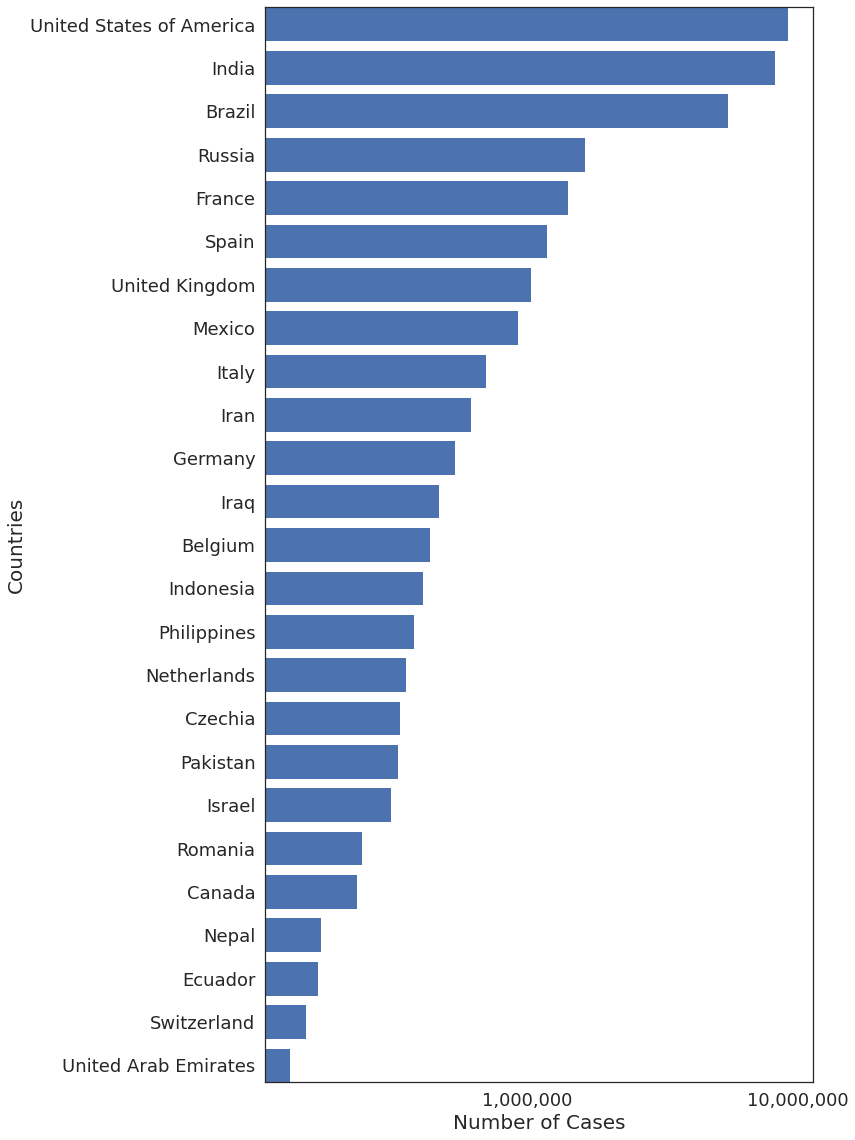

In [ ]:
# Plotting graph
sns.set_theme(style='white')
plt.figure(figsize=(12,16))
top_countries_list = format_names(df_top_countries.index)
plt.barh(top_countries_list[::-1], df_top_countries['Total Cases'].values[::-1]) # Reversing the order to have heighest values at the top of bar chart
#plt.title(f'Top {len(top_countries)} Countries with Most Cases')
plt.xscale('log')
ax = plt.axes() # for updating axes values to plain text
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.margins(y=0)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Number of Cases', fontsize=20)
plt.ylabel('Countries',fontsize=20)
plt.tight_layout()
plt.savefig(f'{bar_plot_path}/top_selected_country_cases.pdf')
plt.show()

In [ ]:
"""
# Plotting graph
sns.set_theme(style='white')
plt.figure(figsize=(12,16), dpi=90)

#plt.bar(df_top_countries.index, df_top_countries['Total Cases'].values)
top_countries_list = format_names(df_top_countries.index)
plt.barh(top_countries_list, df_top_countries['Total Cases'].values)

#plt.axvline(Number_of_countries-0.5, 0,1, ls='--', c='black')
plt.axhline(y=(Number_of_countries-0.5), ls='--', c='black')

plt.title(f'Top {len(top_countries)} Countries with Most Cases')

plt.xscale('log')
ax = plt.axes() # for updating 
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # To get labels in plain text 
#plt.xticks(rotation=90)
plt.margins(y=0)
plt.xlabel('Number of Cases')
plt.ylabel('Countries')
plt.show()
"""

"\n# Plotting graph\nsns.set_theme(style='white')\nplt.figure(figsize=(12,16), dpi=90)\n\n#plt.bar(df_top_countries.index, df_top_countries['Total Cases'].values)\ntop_countries_list = format_names(df_top_countries.index)\nplt.barh(top_countries_list, df_top_countries['Total Cases'].values)\n\n#plt.axvline(Number_of_countries-0.5, 0,1, ls='--', c='black')\nplt.axhline(y=(Number_of_countries-0.5), ls='--', c='black')\n\nplt.title(f'Top {len(top_countries)} Countries with Most Cases')\n\nplt.xscale('log')\nax = plt.axes() # for updating \nax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))\n\n#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # To get labels in plain text \n#plt.xticks(rotation=90)\nplt.margins(y=0)\nplt.xlabel('Number of Cases')\nplt.ylabel('Countries')\nplt.show()\n"

## Average cases of top selected countries

In [ ]:
dict_countries_avg = Counter(total_countries)

for country in dict_countries.keys():
  dict_countries_avg[country] = df_grouped.get_group(country)['cases'].mean()

# Average cases for all countries
df_avg_cases_countries = pd.DataFrame.from_dict(dict_countries_avg, orient='index', columns=['Average'])

# List of top selected countries
top_countries = list(df_top_countries.index)

# Average of selected top countries
avg_df = df_avg_cases_countries[df_avg_cases_countries.index.isin(top_countries)]
avg_df

,Average
Belgium,1431.568
Brazil,18005.536
Canada,768.964
Czechia,1109.234
Ecuador,558.396
France,4590.633
Germany,1769.568
India,26805.580
Indonesia,1371.375
Iran,2014.581


# Common Methods for All Experiments

## Common Methods

#### Updated Number of countries

In [ ]:
Number_of_countries = 4

In [ ]:
# Global variables for countries
countries = top_countries[0:Number_of_countries]

In [ ]:
# Return a combined dataframe for a each error statistics(MAE,RMSE,MAPE etc) along with the newly added mean row.
def get_metric_with_mean(result: pd.DataFrame, error_metric: str)->pd.DataFrame:
  df_grouped = result.groupby('EvaluationMeasurement')
  df = df_grouped.get_group(error_metric).reset_index(drop=True)
  df = df.append(df.describe().loc['mean'])
  return df

In [ ]:
def calc_mean_to_max_error(df, max_of_pretrain_days, max_of_df):
  i=-1
  for row_num in range(len(df)-1):  # Go before mean row
    i += 1
    for col_num in df.columns[2:]:
      df.loc[row_num,col_num] = df.loc[row_num,col_num]/max_of_pretrain_days[i] 
  
  for col in df.columns[2:]:
      df.loc['mean',col] = df.loc['mean',col]/max_of_df

  return df

In [ ]:
# Note: Do not change the filenames, since they are later being used for visualizations 
def save_runtime(df,path,country=None,static_learner=True,alternate_batch=False, transpose=False):
  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  if country==None:
    if static_learner:
      df.to_latex(f'{path}/combined25country_runtime_static.tex')
      df.to_csv(f'{path}/combined25country_runtime_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_runtime_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_runtime_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_runtime_incremental.tex')
        df.to_csv(f'{path}/combined25country_runtime_incremental.csv')
  else:
    if static_learner:
      df.to_latex(f'{path}/{country}_runtime_static.tex')
      df.to_csv(f'{path}/{country}_runtime_static.csv')
    else:
      df.to_latex(f'{path}/{country}_runtime_incremental.tex')
      df.to_csv(f'{path}/{country}_runtime_incremental.csv')

In [ ]:
# Note: Do not change the filenames, since they are later being used for visualizations 
def save_summary_table(df,path,country=False,static_learner=True,alternate_batch=False, transpose=False):

  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  if country:
    metric = df.loc['EvaluationMeasurement'].unique()[0]
    if static_learner:
      df.to_latex(f'{path}/top_countries_{metric}_summary_table_static.tex')
      df.to_csv(f'{path}/top_countries_{metric}_summary_table_static.csv')
    else:
      df.to_latex(f'{path}/top_countries_{metric}_summary_table_incremental.tex')
      df.to_csv(f'{path}/top_countries_{metric}_summary_table_incremental.csv')
    
  else:
    if static_learner:
      df.to_latex(f'{path}/combined25country_summary_table_static.tex')
      df.to_csv(f'{path}/combined25country_summary_table_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_summary_table_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_summary_table_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_summary_table_incremental.tex')
        df.to_csv(f'{path}/combined25country_summary_table_incremental.csv')
    

In [ ]:
# Note: Do not change the filenames since they are later being used for visualizations
def save_metrics(df, path, country=None, static_learner=True, alternate_batch=False, transpose=False): 
  df = df.apply(pd.to_numeric,errors='ignore') # Converting the dataframe to numeric
  df = df.round(decimal) # Setting the precision
  
  # if transpose flag is set to true
  if transpose:
    df = df.transpose()

  metric_type = df.loc['EvaluationMeasurement'].unique()[0]
  if country==None:
    if static_learner:
      df.to_latex(f'{path}/combined25country_{metric_type}_static.tex')
      df.to_csv(f'{path}/combined25country_{metric_type}_static.csv')
    else:
      if alternate_batch:
         df.to_latex(f'{path}/combined25country_{metric_type}_incremental_alternate_batch.tex')
         df.to_csv(f'{path}/combined25country_{metric_type}_incremental_alternate_batch.csv')
      else:
        df.to_latex(f'{path}/combined25country_{metric_type}_incremental.tex')
        df.to_csv(f'{path}/combined25country_{metric_type}_incremental.csv')
  else:
    if static_learner:
      df.to_latex(f'{path}/{country}_{metric_type}_static.tex')
      df.to_csv(f'{path}/{country}_{metric_type}_static.csv')
    else:
      df.to_latex(f'{path}/{country}_{metric_type}_incremental.tex')
      df.to_csv(f'{path}/{country}_{metric_type}_incremental.csv')

In [ ]:
def save_combined_summary_table(df, path, static_learner=False,transpose=False):
  df = df.apply(pd.to_numeric,errors='ignore')
  df = df.round(decimal)
  if transpose:
    df = df.transpose()
  
  if static_learner:
    save_path = f'{path}/summary_table_combined_mean_static'
  else:
    save_path = f'{path}/summary_table_combined_mean_incremental'

  df.to_csv(f'{save_path}.csv')
  df.to_latex(f'{save_path}.tex')

In [ ]:
def display_runtime_per_country(results_runtime,countries):
  for i in range(len(countries)):
    print(f'_____________Running Time for {countries[i]}________________')
    print(results_runtime[i].to_string())
    print('\n')

In [ ]:
def calc_save_err_metric_countrywise(countries, error_metrics, results, max_of_pretrain_per_country, max_cases_per_country, path, static_learner, transpose):
  countrywise_error_scores={}
  for i in range(len(countries)):
    country_error_score = []
    for error_metric in error_metrics:
      
      df_error_metric = get_metric_with_mean(results[i], error_metric=error_metric)

      #if error_metric != 'MAPE':
      #  df_error_metric = calc_mean_to_max_error(df_error_metric, max_of_pretrain_per_country[i], max_cases_per_country[i])

      country_error_score.append(df_error_metric)
      display_countrywise_scores(countries[i],df_error_metric)

      # Transposing the metrics while saving
      save_metrics(df_error_metric, path=path, country=countries[i], static_learner=static_learner, transpose=transpose)
      
    countrywise_error_scores[countries[i]] = pd.concat(country_error_score,ignore_index=True)
    
  return countrywise_error_scores

In [ ]:
def calc_save_err_metric_combined(error_metrics, results, max_of_pretrain_days, max_selected_countries, path, static_learner, alternate_batch, transpose):
  combined_err_metric = []
  for error_metric in error_metrics:
    df_error_metric = get_metric_with_mean(results, error_metric=error_metric)

    #if error_metric != 'MAPE':
    #  df_error_metric = calc_mean_to_max_error(df_error_metric, max_of_pretrain_days, max_selected_countries)

    # Transposing the metrics while saving
    save_metrics(df_error_metric, path=path, static_learner=static_learner, alternate_batch=alternate_batch, transpose=transpose)
    
    combined_err_metric.append(df_error_metric)
  return (pd.concat(combined_err_metric, ignore_index=True))

In [ ]:
def get_summary_table(df_result, df_runtime_result, error_metrics, static_learner=True):
  sum_metric=[]
  measure_col_name = 'Metric'
  
  # Setting start row and column for static and incremental learner
  for metric in error_metrics:
    start_row = 'mean'
    if static_learner:
      start_col='RandomForest'
    else:
      start_col='HT_Reg'

    df_metric = get_metric_with_mean(df_result, metric)
    df_row = pd.DataFrame([df_metric.loc[start_row][start_col:]])
    
    df_row[measure_col_name] = str(metric)    
    sum_metric.append(df_row)

  # Adding run time
  df_runtime_row = pd.DataFrame([df_runtime_result.describe().loc[start_row][start_col:]])
  df_runtime_row[measure_col_name]='Time(sec)'
  sum_metric.append(df_runtime_row)

  df_summary = pd.concat(sum_metric, ignore_index=True)
  df_summary.set_index(measure_col_name, inplace=True)

  return df_summary

In [ ]:
def get_summary_table_countrywise(df_result_dict, error_metrics, static_learner=True):  #df_runtime_result,
  summary_metric=[]
  measure_col_name = f'Country({str(error_metrics[0])})'
  eval_measure_col = 'EvaluationMeasurement'
  start_row = 'mean'
  if static_learner:
    start_col='RandomForest'
  else:
    start_col='HT_Reg'

  for country in df_result_dict.keys():
    df_result = df_result_dict[country]

    # Setting start row and column for static and incremental learner
    for metric in error_metrics:      
      df_metric = get_metric_with_mean(df_result, metric)
      df_row = pd.DataFrame([df_metric.loc[start_row][start_col:]])
      df_row[eval_measure_col] = metric
      df_row[measure_col_name] = country
      summary_metric.append(df_row)

  df_summary = pd.concat(summary_metric, ignore_index=True)
  df_summary.set_index(measure_col_name, inplace=True)

  return df_summary

In [ ]:
def get_sum_table_combined_mean(countrywise_error_score_incremental,results_runtime, static_learner=False):
  sum_table_combined_mean=[]
  measure_col_name = 'Metric'
  start_row = 'mean'
  if static_learner:
    start_col = 'RandomForest'
  else:
    start_col= 'HT_Reg'

  for metric in error_metrics:
    df_sum_cur_metric = get_summary_table_countrywise(countrywise_error_score_incremental, [metric], static_learner=static_learner)
    df_row = pd.DataFrame([df_sum_cur_metric.describe().loc[start_row]])

    df_row[measure_col_name] = metric
    sum_table_combined_mean.append(df_row)

  # Adding run time
  df_runtime = pd.concat(results_runtime, ignore_index=True).describe().loc[start_row][start_col:]
  df_runtime_row = pd.DataFrame([df_runtime])
  df_runtime_row[measure_col_name]='Time(sec)'
  sum_table_combined_mean.append(df_runtime_row)

  # Concating results to one dataframe
  sum_table_combined_mean = pd.concat(sum_table_combined_mean, ignore_index=True)
  sum_table_combined_mean.set_index(measure_col_name, inplace=True)
  return sum_table_combined_mean

In [ ]:
def check_significance(target_pop, competitor_pop, significance_at: float):
    """
    Comparing algorithms per batch or per country pairs (exp 2 or 1 respectively), 
      so for each pair, we compare the significance of the best algo to all of the the other algos.
    Ttest performed if the distribution is normal, otherwise we perform a non-parametric test.
    """
    model_pop, population = target_pop, competitor_pop  
    
    # Normality tests
    if len(model_pop) >= 8:  # skew test not valid for smaller populations
      value_mdl, p_mdl = normaltest(model_pop.values)
      value_pop, p_pop = normaltest(population.values)
      if (p_mdl >= 0.05) & (p_pop >= 0.05):
          # print('It is likely that both populations are normal. Thus, running T-Test...')
          tset, pval = stats.ttest_ind(model_pop, population)
          if pval < significance_at:    # alpha value is 0.05 or 5%
              significant = 'Significant (Ttest)'
          else:
              significant = 'Not Significant (Ttest)'
      else:
          # print('It is unlikely that the result is normal. Thus, running Wilcoxon test...')
          if np.sum(np.subtract(list(model_pop), list(competitor_pop))) != 0.0:  # if values are identical the test will crash, but we now it's not significant
              tset, pval = stats.wilcoxon(model_pop, population)
              if pval < significance_at:    # alpha value is 0.05 or 5%
                  significant = 'Significant (Wilcox Test)'
              else:
                  significant = 'Not Significant (Wilcox Test)'
          else:
              # print('Warning: results are identical')
              tset, pval = stats.ttest_ind(model_pop, population)
              significant = 'Not Significant (Wilcox Test)'
    else:
      print('Population too small.')
      if np.sum(np.subtract(list(model_pop), list(competitor_pop))) != 0.0:  # if values are identical the test will crash, but we now it's not significant
          tset, pval = stats.wilcoxon(model_pop, population)
          if pval < significance_at:    # alpha value is 0.05 or 5%
              significant = 'Significant (Wilcox Test)'
          else:
              significant = 'Not Significant (Wilcox Test)'
    return pval, significant 

## Combining Dataset

In [ ]:
def sortby_date_and_set_index(df):
  df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
  df.sort_values('date', inplace=True)
  df.set_index('date', inplace=True)
  return df

In [ ]:
def get_dataset_with_target(countries, df_grouped):
  
  # Empty list to store Dataframes of each country
  frames = []
  
  for country in countries:
    
    df = df_grouped.get_group(country)

    # Creating feature 'day_no'
    df['day_no']= pd.Series([i for i in range(1,len(df)+1)], index=df.index)

    # Reordering features
    df = df[['day_no', 'country','cases']]

    # Adding features through lags
    df = create_features_with_lags(df)

    # Creating target with last 10 days cases
    df['target'] = df.iloc[:,[2]+[i*-1 for i in range(1,10)]].mean(axis=1)

    # Dropping null columns
    df.dropna(how='any', axis=0, inplace=True)

    # Dropping mid columns
    drop_columns = list(df.loc[:,'cases_t-38':'cases_t-1'].columns)
    df.drop(drop_columns, axis=1, inplace=True)

    frames.append(df)

  return (pd.concat(frames, ignore_index=True))

In [ ]:
def reshape_dataframe(*data: np.ndarray):
    # This function adds an extra dimension which is necessary in the LSTM
    arr = []
    for d in data:
        arr.append(np.reshape(np.array(d), (d.shape[0], 1, d.shape[1])))
    return arr

In [ ]:
def get_countries_sortedby_cases(valid_countries, df_grouped):
  # A dictionary of all countries
  dict_countries = Counter(valid_countries)

  for country in dict_countries.keys():
    dict_countries[country] = df_grouped.get_group(country)['cases'].sum()

  # Sorting countries based on number of cases
  countries_sortedby_cases = sorted(dict_countries.items(), key=lambda dict_countries: dict_countries[1], reverse=True)

  # Creating dataframe 
  df_countries_sortedbycases = pd.DataFrame.from_dict(dict(countries_sortedby_cases), orient='index', columns=['Total Cases'])
  
  return df_countries_sortedbycases

In [ ]:
# Getting a list of valid countries
def get_countries_with_valid_size(df):
  total_countries = list(df_grouped.groups.keys())

  # A list for countries with required datasize
  valid_countries = []

  # List of countries with more than 230 records. Because, max training size = 150, lags removed = 50, prediction = 30.
  for country in total_countries:
    if len(df_grouped.get_group(country)) >= 230:
      valid_countries.append(country)

  return valid_countries

In [ ]:
def preprocess_dataset(df):  
  # Selecting required features
  df= df[['dateRep','cases','countriesAndTerritories']]

  # Rename features
  df.rename(columns={'countriesAndTerritories':'country', 'dateRep':'date'}, inplace=True)

  # Convert to date, sort and set index
  df = sortby_date_and_set_index(df)

  return df

In [ ]:
# Calculating maximum of dataframe for every pretrain size
def calc_max_of_pretrain_days(pretrain_days,df)->list:
  max_of_pretrain_days = []
  
  for day in pretrain_days:
    df_subset = create_subset(df,day)
    max_of_pretrain_days.append(df_subset['cases'].max())
  
  return max_of_pretrain_days

In [ ]:
def display_scores(results):
  #print(f'_________________________________{country}____________________________________________')
  df_MAE = get_metric_with_mean(results,'MAE' )
  df_RMSE = get_metric_with_mean(results,'RMSE')
  df_MAPE = get_metric_with_mean(results,'MAPE')
  print('MAE Score')
  print(df_MAE.to_string())
  print('-----------------------------------------------------------------------------------')
  print('RMSE Score')
  print(df_RMSE.to_string())
  print('-----------------------------------------------------------------------------------')
  print('MAPE Score')
  print(df_MAPE.to_string())
  print('\n\n')

## Alternate Batch

In [ ]:
def get_alternate_batch_records_idx(batch_size,total_records): 
  total_batches = total_records//batch_size
  current_batch=1
  start_idx = 0
  end_idx = batch_size
  idx_list = []
  
  while current_batch <= total_batches:
    if current_batch%2!=0:
      idx_list.extend([x for x in range(start_idx,end_idx)])
      start_idx = idx_list[-1]+(batch_size+1)
      end_idx = start_idx + batch_size
    current_batch += 1

  return idx_list

In [ ]:
def create_alternate_batch_subset(df,days,batch_size):
  df_grouped = df.groupby('country')
  countries = df['country'].unique()
  frame1,frame2 = [],[]

  for country in countries:
    df_cur_country = df_grouped.get_group(country)

    df1 = df_cur_country.iloc[0:days//2]
    df2 = df_cur_country.iloc[days:days+30]  # Adding 30 for a testing batch that is one month ahead
    
    # Selecting alternate batches
    idx = get_alternate_batch_records_idx(batch_size,total_records=len(df2))
    df2 = df2.iloc[idx]

    # Appending dataframes
    frame1.append(df1)
    frame2.append(df2)

  r1 = pd.concat(frame1, ignore_index=True)
  r2 = pd.concat(frame2, ignore_index=True)
  r = r1.append(r2, ignore_index=True)
  
  return (r)

## Incremental Learner

In [ ]:
def instantiate_regressors():
  ht_reg = HoeffdingTreeRegressor()
  hat_reg = HoeffdingAdaptiveTreeRegressor()
  arf_reg = AdaptiveRandomForestRegressor()
  pa_reg = PassiveAggressiveRegressor(max_iter=1, random_state=0, tol=1e-3)

  model = [ht_reg, hat_reg, arf_reg, pa_reg]
  model_names = ['HT_Reg', 'HAT_Reg', 'ARF_Reg', 'PA_Reg']

  return model, model_names

In [ ]:
def get_error_scores_per_model(evaluator, mdl_evaluation_scores)-> pd.DataFrame:
  
  for i in range(len(evaluator.model_names)):
    # Desired error metrics
    mse = evaluator.mean_eval_measurements[i].get_mean_square_error()
    mae = evaluator.mean_eval_measurements[i].get_average_error()
    mape = evaluator.mean_eval_measurements[i].get_mean_absolute_percentage_error()
    rmse = sqrt(mse)

    # Dictionary of errors per model
    mdl_evaluation_scores[str(evaluator.model_names[i])] = [rmse, mae, mape]

  return(pd.DataFrame(mdl_evaluation_scores))


In [ ]:
def get_running_time_per_model_incremental_learner(evaluator,day):
    cols = ['PretrainDays']  # Adding pretrain as first column
    cols += evaluator.model_names  # Adding remaining columns of different algorithm
    running_time = []
    running_time.append(day)
    for i in range(len(evaluator.model_names)):
        running_time.append(evaluator.running_time_measurements[i]._total_time)

    return (pd.DataFrame([running_time],columns=cols))  # Passing running_time as a list of list to insert it as a row

In [ ]:
def display_countrywise_scores(country,df_error_metric):
  print(f'_________________________________{country}____________________________________________')
  print(df_error_metric.to_string())
  print('\n\n')

In [ ]:
# Create a dataframe of all countries with pre-train size = pretrain days and test&train size = pretrain days
def create_subset(result,days):
  result_grouped = result.groupby('country')
  countries = result['country'].unique()
  frame1,frame2 = [],[]
  for country in countries:
    df = result_grouped.get_group(country) 
    df1 = df.iloc[0:days]
    df2 = df.iloc[days:days+30]
    frame1.append(df1)
    frame2.append(df2)

  r1 = pd.concat(frame1, ignore_index=True)
  r2 = pd.concat(frame2, ignore_index=True)
  r = r1.append(r2, ignore_index=True)
  
  return (r)

## Static Learner

In [ ]:
def mean_absolute_percentage_error(actual, predicted):
    """
    Mean absolute percentage error (MAPE).
    :return error
    """
    actual =  np.array(actual) 
    predicted = np.array(predicted) 

    mask = actual != 0
    return (np.fabs(actual - predicted) / np.fabs(actual))[mask].mean()

In [ ]:
def get_scores(y_true, model_predictions, days):
    mdl_evaluation_scores = {}
    mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']
    mdl_evaluation_scores['PretrainDays'] = [days] * len(mdl_evaluation_scores['EvaluationMeasurement'])

    for model in model_predictions:
        y_pred = model_predictions[model]
        if model == 'LSTM':
            rmse = mean_squared_error(y_true[:, np.newaxis], y_pred, squared=False)
            mae = mean_absolute_error(y_true[:, np.newaxis], y_pred)
            mape = mean_absolute_percentage_error(y_true[:, np.newaxis], y_pred)
        else:
            rmse = mean_squared_error(y_true, y_pred, squared=False)
            mae = mean_absolute_error(y_true, y_pred)
            mape = mean_absolute_percentage_error(y_true, y_pred)

        mdl_evaluation_scores[model] = [rmse, mae, mape]
    return pd.DataFrame(mdl_evaluation_scores)

In [ ]:
def get_running_time_per_model_static_learner(model_predictions,total_execution_time):
    cols = ['PretrainDays']
    cols += model_predictions.keys()
    return pd.DataFrame(total_execution_time, columns=cols)


def measure(wrapped_func):
    @wraps(wrapped_func)
    def _time_it(*args, **kwargs):
        start = pc_timer()
        try:
            model_predictions = wrapped_func(*args, **kwargs)
        finally:
            end_ = pc_timer() - start
            return model_predictions, end_
    return _time_it


@measure
def train_test_model(regressor, X_train, y_train, X_test):
    regressor.fit(X_train, y_train)
    return regressor.predict(X_test)


@measure
def train_test_lstm(regressor, X_train_lstm, y_train, X_val_lstm, y_val, X_test_lstm, patience, epochs, batch_size_lstm):
    regressor.compile(loss='mae', optimizer='adagrad', metrics=['mse', 'mae'])

    history = regressor.fit(
        X_train_lstm,
        y_train,
        validation_data=(X_val_lstm, y_val),
        epochs=epochs,
        batch_size=batch_size_lstm,
        callbacks=[EarlyStopping(monitor='val_loss',
                                 mode='min',
                                 patience=patience)])

    return regressor.predict(X_test_lstm)

In [ ]:
def define_lstm_model(x_train_lstm, layers, activations, patience):
    # Start defining the model
    input_shape = x_train_lstm.shape

    # Definining model first with LSTM n layers
    model = Sequential()
    model.add(LSTM(layers[0], input_shape=input_shape[1:], activation=activations[0], return_sequences=True))

    # Adding middle layers
    for l in range(1, len(layers)-1):
      model.add(LSTM(layers[l], activation=activations[l], return_sequences=True))
      model.add(Dropout(0.2))

    # Add last Dense and LSTMs layers
    if len(layers) > 1:
      model.add(Dense(layers[-1], activation=activations[-1]))
      model.add(Dropout(0.2))
      model.add(LSTM(layers[-1], activation=activations[-1]))

    model.add(Dense(1))  # output layer. Since we have only 1 output value
    # End defining model

    return model


In [ ]:
def normalize_dataset(*dataframes):
    arr = []
    for df in dataframes:
        arr.append(StandardScaler().fit_transform(df))
    return arr

In [ ]:
def get_validation_set(df_train, batch_size=10):
    lst_idx = -1
    total_batches = len(df_train) // batch_size
    train_set, val_set = [], []

    for cur_batch in range(total_batches):
        start = lst_idx + 1
        end = start + batch_size
        if cur_batch % 2 == 0:
            train_set.append(df_train.iloc[start:end])
        else:
            val_set.append(df_train.iloc[start:end])

        lst_idx = end - 1  # adjusting last index because we add 1 in starting

    return pd.concat(train_set, ignore_index=True), pd.concat(val_set, ignore_index=True)


# Experiment 1
Training and testing with five countries individually. 

### Dataset Description

* cases(t): Number of cases on current day(Column='cases') 

* cases(t-n): Number of cases 'n' days before current day 't'

* 30 day gap: Training from day number t-89 to t-39(50 days). Then a gap of 30 days and then creating target by averaging t to t-9(10 Days).


In [ ]:
# Sample set for understanding dataset
sample_df = pd.read_csv(f'{csv_processed_path}/United_States_of_America.csv')
sample_df.head(5)

,date,day_no,country,cases,cases_t-89,cases_t-88,cases_t-87,cases_t-86,cases_t-85,cases_t-84,cases_t-83,cases_t-82,cases_t-81,cases_t-80,cases_t-79,cases_t-78,cases_t-77,cases_t-76,cases_t-75,cases_t-74,cases_t-73,cases_t-72,cases_t-71,cases_t-70,cases_t-69,cases_t-68,cases_t-67,cases_t-66,cases_t-65,cases_t-64,cases_t-63,cases_t-62,cases_t-61,cases_t-60,cases_t-59,cases_t-58,cases_t-57,cases_t-56,cases_t-55,cases_t-54,cases_t-53,cases_t-52,cases_t-51,cases_t-50,cases_t-49,cases_t-48,cases_t-47,cases_t-46,cases_t-45,cases_t-44,cases_t-43,cases_t-42,cases_t-41,cases_t-40,target
0,2020-03-29,90,United_States_of_America,19979,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,11525.000
1,2020-03-30,91,United_States_of_America,18360,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,12877.500
2,2020-03-31,92,United_States_of_America,21595,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,14499.600
3,2020-04-01,93,United_States_of_America,24998,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,16287.100
4,2020-04-02,94,United_States_of_America,27103,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,1.000,1.000,1.000,3.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,19.000,18151.500


## Incremental Learner

In [ ]:
def reset_evaluator(evaluator):  # Added Now
  for j in range(evaluator.n_models):
      evaluator.mean_eval_measurements[j].reset()
      evaluator.current_eval_measurements[j].reset()
  return evaluator


def update_incremental_metrics(evaluator, y, prediction):  # Added Now
  for j in range(evaluator.n_models):
    for i in range(len(prediction[0])):
      evaluator.mean_eval_measurements[j].add_result(y[i], prediction[j][i])
      evaluator.current_eval_measurements[j].add_result(y[i], prediction[j][i])

    # Adding result manually causes y_true_vector to have a objects inserted like array([123.45]) in a list.
    # For calculating metrics we have to convert them into flat list.
    evaluator.mean_eval_measurements[j].y_true_vector = np.array(evaluator.mean_eval_measurements[j].y_true_vector).flatten().tolist()
    evaluator.current_eval_measurements[j].y_true_vector = np.array(evaluator.current_eval_measurements[j].y_true_vector).flatten().tolist()
  return evaluator


def get_error_scores_per_model(evaluator, mdl_evaluation_scores) -> pd.DataFrame:
  for i in range(len(evaluator.model_names)):
    # Desired error metrics
    mse = evaluator.mean_eval_measurements[i].get_mean_square_error()
    mae = evaluator.mean_eval_measurements[i].get_average_error()
    mae = mae[0]  # get_average_error() is returning a List instead of single value.  # Updated Now
    mape = evaluator.mean_eval_measurements[i].get_mean_absolute_percentage_error()
    rmse = sqrt(mse)

    # Dictionary of errors per model
    mdl_evaluation_scores[str(evaluator.model_names[i])] = [rmse, mae, mape]
  return (pd.DataFrame(mdl_evaluation_scores))

In [ ]:
"""
# Old

def scikit_multiflow(df, pretrain_days):

  # Creating a stream from dataframe
  stream = DataStream(np.array(df.iloc[:,4:-1]), y=np.array(df.iloc[:,-1])) # Selecting features x=[t-89:t-39] and y=[target]. TODO: Drop columns with name 

  model, model_names = instantiate_regressors()

  frames, running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      pretrain_days = day
      max_samples = pretrain_days + 30  #Testing on set one month ahead only

      '''evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=day,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], 
                                    max_samples=max_samples)'''
      
      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=day-1,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'], 
                                    max_samples=day)


      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE']
      mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

  # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df

for country in countries:
  # Read each country  
  df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

  # Get evaluation scores and running time for country
  evaluation_scores_df, running_time_df = scikit_multiflow(df_country,pretrain_days)

  # Appending evaluation scores and runtime for each country
  results_incremental.append(evaluation_scores_df)
  results_runtime_incremental.append(running_time_df)

  # Get max of each pretrain subset and for each country dataset
  max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))
  max_cases_per_country.append(df_country['cases'].max())
"""

In [ ]:
def scikit_multiflow(df, pretrain_days):  
  # Creating a stream from dataframe
  stream = DataStream(np.array(df.iloc[:, 4:-1]), y=np.array(
      df.iloc[:, -1]))  # Selecting features x=[t-89:t-39] and y=[target]. TODO: Drop columns with name

  model, model_names = instantiate_regressors()

  frames, running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:
    pretrain_days = day
    # max_samples = pretrain_days + 30  # Training and then testing on set one month ahead only
    max_samples = pretrain_days + 1  # Updated Now
    testing_samples_size = 30  # Updated Now

    evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_days,
                                    metrics=['mean_square_error', 'mean_absolute_error',
                                              'mean_absolute_percentage_error'],
                                    max_samples=max_samples)

    # Run evaluation
    evaluator.evaluate(stream=stream, model=model, model_names=model_names)

    X = stream.X[pretrain_days: pretrain_days + testing_samples_size]  # Added Now
    y = stream.y[pretrain_days: pretrain_days + testing_samples_size]  # Added Now

    prediction = evaluator.predict(X)  # Added Now

    # Since we add one extra sample, reset the evaluator, to test on complete new samples
    evaluator = reset_evaluator(evaluator)  # Added Now

    # Updating metrics
    evaluator = update_incremental_metrics(evaluator, y, prediction)  # Added Now

    # Dictionary to store each iteration error scores
    mdl_evaluation_scores = {}

    # Adding Evaluation Measurements and pretraining days
    mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']
    mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])
    mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

    # Errors of each model on a specific pre-train days
    frames.append(mdl_evaluation_df)

    # Run time for each algorithm
    running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

  # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames, ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df


In [ ]:
# Training all countries
results_incremental = []
results_runtime_incremental = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
    # Read each country
    df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

    # Get evaluation scores and running time for country
    evaluation_scores_df, running_time_df, united_dataframe = scikit_multiflow(df_country,pretrain_days, country)

    save_united_df(united_dataframe, exp1_inc_united_df_path, country=country)

    # Appending evaluation scores and runtime for each country
    results_incremental.append(evaluation_scores_df)

    results_runtime_incremental.append(running_time_df)

    # Get max of each pretrain subset and for each country dataset
    max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))
    max_cases_per_country.append(df_country['cases'].max())


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 30 sample(s).
Evaluating...
 ###################- [97%] [0.52s]
Processed samples: 31
Mean performance:
HT_Reg - MSE          : 27469156.2458
HT_Reg - MAPE          : 0.1831
HT_Reg - MAE          : 5241.102579
HAT_Reg - MSE          : 518033.4060
HAT_Reg - MAPE          : 0.0251
HAT_Reg - MAE          : 719.745376
ARF_Reg - MSE          : 19028.5069
ARF_Reg - MAPE          : 0.0048
ARF_Reg - MAE          : 137.943854
PA_Reg - MSE          : 116920245843.2590
PA_Reg - MAPE          : 11.9438
PA_Reg - MAE          : 341936.025951
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 60 sample(s).
Evaluating...
 #################### [98%] [1.21s]
Processed samples: 61
Mean performance:
HT_Reg - MSE          : 1232322757.5353
HT_Reg - MAPE          : 1.6467
HT_Reg - MAE          : 35104.454953
HAT_Reg - MSE          : 625852723.9667
HAT_Reg - MAPE          : 1.1735
HAT_Reg - MAE          : 25017.048666
ARF_Reg - MSE   

In [ ]:
# Save the running time for each country
for i in range(len(countries)):
  save_runtime(results_runtime_incremental[i], path=exp1_runtime_path, country = countries[i], static_learner=False)

# Display countrywise running time complexity
display_runtime_per_country(results_runtime_incremental, countries)

_____________Running Time for United_States_of_America________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.013    0.019    0.513   0.002
1            60   0.032    0.045    1.147   0.002
2            90   0.050    0.206    1.647   0.002
3           120   0.124    0.164    2.771   0.002
4           150   0.176    0.207    4.731   0.002
5           180   0.254    0.267    4.600   0.004


_____________Running Time for India________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.016    0.025    0.794   0.002
1            60   0.047    0.060    1.285   0.002
2            90   0.037    0.063    1.679   0.002
3           120   0.082    0.291    2.356   0.002
4           150   0.128    0.169    2.975   0.004
5           180   0.190    0.216    3.686   0.002


_____________Running Time for Brazil________________
   PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0            30   0.010    0.018    0.446   0.002
1            60   0.

In [ ]:
countrywise_error_score_incremental = calc_save_err_metric_countrywise(countries, error_metrics, results_incremental, max_of_pretrain_per_country, max_cases_per_country, path=exp1_path, static_learner=False, transpose=True)

_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays      HT_Reg     HAT_Reg     ARF_Reg      PA_Reg
0                      MAE        30.000  303721.172  543820.366 1346053.727 1819162.372
1                      MAE        60.000 1448008.929 1794044.130 1579798.627 5818965.043
2                      MAE        90.000   20005.990   20705.389   43699.996  432785.063
3                      MAE       120.000   11559.992   11560.028   11887.098 1818992.710
4                      MAE       150.000   20166.300   20166.298   16844.438 7566808.707
5                      MAE       180.000    4860.379    4860.379   42974.034  992635.876
mean                   NaN       105.000  301387.127  399192.765  506876.320 3074891.628



_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays  HT_Reg  HAT_Reg  ARF_Reg  PA_Reg
0     

In [ ]:
# Get summary table for each country for specified metric
summary_table_countrywise_incremental = get_summary_table_countrywise(countrywise_error_score_incremental, ['MAPE'], static_learner=False)

# Saving the summary table
save_summary_table(summary_table_countrywise_incremental, exp1_summary_path,country=True, static_learner=False,alternate_batch=False,transpose=True)

summary_table_countrywise_incremental

,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg,EvaluationMeasurement
Country(MAPE),,,,,
United_States_of_America,12.173,16.213,20.855,97.783,MAPE
India,1.319,1.161,1.721,6.632,MAPE
Brazil,2.434,2.816,0.949,10.542,MAPE
Russia,7.548,7.201,8.489,62.896,MAPE


In [ ]:
sum_inc_countrywise_mean = get_sum_table_combined_mean(countrywise_error_score_incremental,results_runtime_incremental)
save_combined_summary_table(sum_inc_countrywise_mean, exp1_summary_path, static_learner=False, transpose=True) 
sum_inc_countrywise_mean

,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
Metric,,,,
MAE,119371.231,145048.333,164602.774,1045789.525
MAPE,5.868,6.848,8.004,44.463
RMSE,178870.267,206623.242,230545.424,1255794.098
Time(sec),0.090,0.133,2.153,0.002


## Static Learner

In [ ]:
def scikit_learn(df, training_days):
    frames = []
    model_predictions = {
        'RandomForest': [],
        'GradientBoosting': [],
        'LinearSVR': [],
        'DecisionTree': [],
        'BayesianRidge': [],
        'LSTM': []
        #'MLPRegressor': [],
        #'LinearRegression': []
    }
    total_execution_time = []
            
    # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
    # params (others like epoch and batch size are also hardcoded in train_test_lstm())
    layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
    activations = ['tanh', 'tanh', 'relu']
    epochs = 500
    patience = 20
    batch_size_lstm = 10

    for day in training_days:
        
        cur_exec_time = [day]  # Keeping runing time for each pre-train set

        train = df.iloc[:day, :]
        test = df.iloc[day:day + 30, :]  # Testing on set one month ahead only, hence day+30.
        
        # training and test sets for all models except LSTM
        X_train, y_train = train.iloc[:, 4:-1], train.iloc[:, -1]
        X_test, y_test = test.iloc[:, 4:-1], test.iloc[:, -1]

        # Seperating validation set from train set
        train_df, val_df = get_validation_set(train, batch_size=10)

        # Splitting test and validation into dependent and independent sets
        X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
        X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

        # Normalizing dataset
        X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

        # Reshaping the dataframes
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)
       

        rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
        model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
        cur_exec_time.append(exec_time)


        gb_reg = GradientBoostingRegressor(random_state=0)
        model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        lsv_reg = LinearSVR(random_state=0, tol=1e-5)
        model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        dt_reg = DecisionTreeRegressor(random_state=0)
        model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)


        br_reg = BayesianRidge()
        model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
        cur_exec_time.append(exec_time)

        
        lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
        model_predictions['LSTM'],exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs, batch_size_lstm)
        cur_exec_time.append(exec_time)

        
        mdl_evaluation_df = get_scores(y_test, model_predictions, day)
        total_execution_time.append(cur_exec_time)
        frames.append(mdl_evaluation_df)

    evaluation_score_df = pd.concat(frames, ignore_index=True)
    running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
    return evaluation_score_df, running_time_df


In [ ]:
# Training all countries
results_static = []
results_runtime_static = []
max_of_pretrain_per_country = []
max_cases_per_country = []

for country in countries:
  # Read country wise csv file
  df_country = pd.read_csv(f'{csv_processed_path}/{country}.csv')

  # Evaluation scores and running time of each algorithm over different pre-training days
  evaluation_scores_df, running_time_df = scikit_learn(df_country, pretrain_days)

  # Append result of each pretrain size in results
  results_static.append(evaluation_scores_df)

  # Appending every country runtime 
  results_runtime_static.append(running_time_df)

  # Calculating max cases per country based on pre-train size
  max_of_pretrain_per_country.append(calc_max_of_pretrain_days(pretrain_days,df_country))

  # Maximum case of each country
  max_cases_per_country.append(df_country['cases'].max())

Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 96ms/step - loss: 24206.4551 - mse: 624614400.0000 - mae: 24206.4551 - val_loss: 30089.3496 - val_mse: 906655424.0000 - val_mae: 30089.3496
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 24206.4189 - mse: 624612672.0000 - mae: 24206.4180 - val_loss: 30089.3184 - val_mse: 906653376.0000 - val_mae: 30089.3184
Epoch 3/500
20/20 [==============================] - 0s 843us/step - loss: 24206.3809 - mse: 624610880.0000 - mae: 24206.3809 - val_loss: 30089.2812 - val_mse: 906651264.0000 - val_mae: 30089.2812
Epoch 4/500
20/20 [==============================] - 0s 850us/step - loss: 24206.3174 - mse: 624608000.0000 - mae: 24206.3184 - val_loss: 30089.2227 - val_mse: 906647744.0000 - val_mae: 30089.2227
Epoch 5/500
20/20 [==============================] - 0s 941us/step - loss: 24206.1846 - mse: 624602240.0000 - mae: 24206.1836 - val_loss: 30089.1133 - val_mse: 906641088.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 62ms/step - loss: 24466.5130 - mse: 625249600.0000 - mae: 24466.5117 - val_loss: 26857.2070 - val_mse: 732523200.0000 - val_mae: 26857.2090
Epoch 2/500
30/30 [==============================] - 0s 1ms/step - loss: 24466.4688 - mse: 625247552.0000 - mae: 24466.4688 - val_loss: 26857.1504 - val_mse: 732520000.0000 - val_mae: 26857.1504
Epoch 3/500
30/30 [==============================] - 0s 935us/step - loss: 24466.3880 - mse: 625243776.0000 - mae: 24466.3867 - val_loss: 26856.8809 - val_mse: 732504448.0000 - val_mae: 26856.8809
Epoch 4/500
30/30 [==============================] - 0s 888us/step - loss: 24465.8574 - mse: 625217920.0000 - mae: 24465.8574 - val_loss: 26855.2754 - val_mse: 732411328.0000 - val_mae: 26855.2754
Epoch 5/500
30/30 [==============================] - 0s 942us/step - loss: 24463.7428 - mse: 625116928.0000 - mae: 24463.7422 - val_loss: 26851.7734 - val_mse: 732208384.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 40ms/step - loss: 24047.3410 - mse: 597862144.0000 - mae: 24047.3398 - val_loss: 25553.9204 - val_mse: 666561152.0000 - val_mae: 25553.9199
Epoch 2/500
50/50 [==============================] - 0s 734us/step - loss: 24047.2805 - mse: 597859136.0000 - mae: 24047.2793 - val_loss: 25553.8184 - val_mse: 666555712.0000 - val_mae: 25553.8184
Epoch 3/500
50/50 [==============================] - 0s 850us/step - loss: 24046.9832 - mse: 597844928.0000 - mae: 24046.9824 - val_loss: 25553.0293 - val_mse: 666511168.0000 - val_mae: 25553.0273
Epoch 4/500
50/50 [==============================] - 0s 811us/step - loss: 24045.4691 - mse: 597772736.0000 - mae: 24045.4707 - val_loss: 25550.1621 - val_mse: 666351040.0000 - val_mae: 25550.1602
Epoch 5/500
50/50 [==============================] - 0s 856us/step - loss: 24041.9313 - mse: 597594624.0000 - mae: 24041.9316 - val_loss: 25545.3110 - val_mse: 666084544

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 32ms/step - loss: 29102.6185 - mse: 994166912.0000 - mae: 29102.6211 - val_loss: 34679.6745 - val_mse: 1438883840.0000 - val_mae: 34679.6758
Epoch 2/500
60/60 [==============================] - 0s 777us/step - loss: 29101.7959 - mse: 994122688.0000 - mae: 29101.7949 - val_loss: 34676.8089 - val_mse: 1438705024.0000 - val_mae: 34676.8086
Epoch 3/500
60/60 [==============================] - 0s 697us/step - loss: 29095.2887 - mse: 993765184.0000 - mae: 29095.2891 - val_loss: 34666.2806 - val_mse: 1438018432.0000 - val_mae: 34666.2773
Epoch 4/500
60/60 [==============================] - 0s 749us/step - loss: 29083.3867 - mse: 993090816.0000 - mae: 29083.3867 - val_loss: 34651.7617 - val_mse: 1437043968.0000 - val_mae: 34651.7617
Epoch 5/500
60/60 [==============================] - 0s 777us/step - loss: 29069.4779 - mse: 992276032.0000 - mae: 29069.4766 - val_loss: 34633.2484 - val_mse: 14357

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 35870.6987 - mse: 1551459072.0000 - mae: 35870.6992 - val_loss: 37658.1875 - val_mse: 1674844544.0000 - val_mae: 37658.1875
Epoch 2/500
80/80 [==============================] - 0s 740us/step - loss: 35870.3269 - mse: 1551435008.0000 - mae: 35870.3281 - val_loss: 37656.9361 - val_mse: 1674758144.0000 - val_mae: 37656.9375
Epoch 3/500
80/80 [==============================] - 0s 714us/step - loss: 35865.5627 - mse: 1551120256.0000 - mae: 35865.5664 - val_loss: 37645.6655 - val_mse: 1673951872.0000 - val_mae: 37645.6641
Epoch 4/500
80/80 [==============================] - 0s 711us/step - loss: 35847.2859 - mse: 1549872768.0000 - mae: 35847.2891 - val_loss: 37618.9805 - val_mse: 1671981824.0000 - val_mae: 37618.9805
Epoch 5/500
80/80 [==============================] - 0s 738us/step - loss: 35813.9175 - mse: 1547563904.0000 - mae: 35813.9180 - val_loss: 37581.4269 - val_mse: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 23ms/step - loss: 36156.3874 - mse: 1543868928.0000 - mae: 36156.3867 - val_loss: 38268.4759 - val_mse: 1666708480.0000 - val_mae: 38268.4766
Epoch 2/500
90/90 [==============================] - 0s 714us/step - loss: 36155.8457 - mse: 1543838976.0000 - mae: 36155.8438 - val_loss: 38267.0673 - val_mse: 1666625024.0000 - val_mae: 38267.0664
Epoch 3/500
90/90 [==============================] - 0s 673us/step - loss: 36151.1630 - mse: 1543563264.0000 - mae: 36151.1641 - val_loss: 38259.0026 - val_mse: 1666109312.0000 - val_mae: 38259.0039
Epoch 4/500
90/90 [==============================] - 0s 836us/step - loss: 36139.7355 - mse: 1542775936.0000 - mae: 36139.7344 - val_loss: 38243.5145 - val_mse: 1664999936.0000 - val_mae: 38243.5156
Epoch 5/500
90/90 [==============================] - 0s 831us/step - loss: 36117.9833 - mse: 1541349376.0000 - mae: 36117.9844 - val_loss: 38222.5102 - val_mse: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 89ms/step - loss: 738.9727 - mse: 829283.1250 - mae: 738.9728 - val_loss: 711.0131 - val_mse: 527260.3750 - val_mae: 711.0131
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 738.9482 - mse: 829246.5000 - mae: 738.9482 - val_loss: 710.9930 - val_mse: 527232.0000 - val_mae: 710.9930
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 738.9283 - mse: 829218.6250 - mae: 738.9283 - val_loss: 710.9742 - val_mse: 527205.3750 - val_mae: 710.9742
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 738.9111 - mse: 829190.8750 - mae: 738.9111 - val_loss: 710.9550 - val_mse: 527178.3125 - val_mae: 710.9550
Epoch 5/500
20/20 [==============================] - 0s 964us/step - loss: 738.8858 - mse: 829157.5000 - mae: 738.8859 - val_loss: 710.9313 - val_mse: 527145.3750 - val_mae: 710.9313
Epoch 6/500
20/20 [=============================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 2s 71ms/step - loss: 1637.3320 - mse: 4521326.0000 - mae: 1637.3320 - val_loss: 2644.3892 - val_mse: 10816034.0000 - val_mae: 2644.3892
Epoch 2/500
30/30 [==============================] - 0s 1ms/step - loss: 1637.3040 - mse: 4521227.5000 - mae: 1637.3040 - val_loss: 2644.3615 - val_mse: 10815879.0000 - val_mae: 2644.3616
Epoch 3/500
30/30 [==============================] - 0s 1ms/step - loss: 1637.2753 - mse: 4521128.5000 - mae: 1637.2753 - val_loss: 2644.3267 - val_mse: 10815667.0000 - val_mae: 2644.3267
Epoch 4/500
30/30 [==============================] - 0s 970us/step - loss: 1637.2347 - mse: 4520990.5000 - mae: 1637.2349 - val_loss: 2644.2536 - val_mse: 10815211.0000 - val_mae: 2644.2537
Epoch 5/500
30/30 [==============================] - 0s 997us/step - loss: 1637.1276 - mse: 4520523.5000 - mae: 1637.1276 - val_loss: 2644.0318 - val_mse: 10813778.0000 - val_mae: 2644.0317
Epoch 6/500

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 2s 35ms/step - loss: 5100.9227 - mse: 48605900.0000 - mae: 5100.9229 - val_loss: 4477.9179 - val_mse: 33087478.0000 - val_mae: 4477.9180
Epoch 2/500
50/50 [==============================] - 0s 899us/step - loss: 5100.8400 - mse: 48605136.0000 - mae: 5100.8398 - val_loss: 4477.7320 - val_mse: 33086240.0000 - val_mae: 4477.7319
Epoch 3/500
50/50 [==============================] - 0s 937us/step - loss: 5100.4015 - mse: 48601788.0000 - mae: 5100.4014 - val_loss: 4476.4669 - val_mse: 33078972.0000 - val_mae: 4476.4673
Epoch 4/500
50/50 [==============================] - 0s 934us/step - loss: 5098.3113 - mse: 48590416.0000 - mae: 5098.3110 - val_loss: 4472.5010 - val_mse: 33054176.0000 - val_mae: 4472.5010
Epoch 5/500
50/50 [==============================] - 0s 890us/step - loss: 5093.7101 - mse: 48557772.0000 - mae: 5093.7104 - val_loss: 4466.1779 - val_mse: 33007716.0000 - val_mae: 4466.1782
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 2s 36ms/step - loss: 8366.7909 - mse: 142962656.0000 - mae: 8366.7910 - val_loss: 12068.7657 - val_mse: 298673728.0000 - val_mae: 12068.7656
Epoch 2/500
60/60 [==============================] - 0s 987us/step - loss: 8366.3043 - mse: 142958656.0000 - mae: 8366.3037 - val_loss: 12066.5468 - val_mse: 298652832.0000 - val_mae: 12066.5459
Epoch 3/500
60/60 [==============================] - 0s 808us/step - loss: 8361.3346 - mse: 142921120.0000 - mae: 8361.3340 - val_loss: 12057.5299 - val_mse: 298560864.0000 - val_mae: 12057.5293
Epoch 4/500
60/60 [==============================] - 0s 793us/step - loss: 8350.0826 - mse: 142826192.0000 - mae: 8350.0820 - val_loss: 12045.3015 - val_mse: 298406176.0000 - val_mae: 12045.3008
Epoch 5/500
60/60 [==============================] - 0s 816us/step - loss: 8339.5107 - mse: 142714944.0000 - mae: 8339.5107 - val_loss: 12030.6914 - val_mse: 298168192.0000 - va

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 23ms/step - loss: 20378.7620 - mse: 916130112.0000 - mae: 20378.7617 - val_loss: 18686.5015 - val_mse: 743997504.0000 - val_mae: 18686.5020
Epoch 2/500
80/80 [==============================] - 0s 875us/step - loss: 20377.7231 - mse: 916112896.0000 - mae: 20377.7227 - val_loss: 18683.3140 - val_mse: 743952512.0000 - val_mae: 18683.3145
Epoch 3/500
80/80 [==============================] - 0s 794us/step - loss: 20372.3534 - mse: 916030464.0000 - mae: 20372.3535 - val_loss: 18674.6824 - val_mse: 743790080.0000 - val_mae: 18674.6816
Epoch 4/500
80/80 [==============================] - 0s 686us/step - loss: 20361.5498 - mse: 915776704.0000 - mae: 20361.5508 - val_loss: 18660.7556 - val_mse: 743407936.0000 - val_mae: 18660.7559
Epoch 5/500
80/80 [==============================] - 0s 677us/step - loss: 20347.0885 - mse: 915352256.0000 - mae: 20347.0879 - val_loss: 18643.1678 - val_mse: 742919744

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 26ms/step - loss: 27657.0602 - mse: 1635659904.0000 - mae: 27657.0605 - val_loss: 32678.2256 - val_mse: 2082540032.0000 - val_mae: 32678.2285
Epoch 2/500
90/90 [==============================] - 0s 819us/step - loss: 27650.0822 - mse: 1635537152.0000 - mae: 27650.0801 - val_loss: 32663.3263 - val_mse: 2082175232.0000 - val_mae: 32663.3281
Epoch 3/500
90/90 [==============================] - 0s 782us/step - loss: 27632.1408 - mse: 1635237888.0000 - mae: 27632.1387 - val_loss: 32644.7546 - val_mse: 2081692800.0000 - val_mae: 32644.7559
Epoch 4/500
90/90 [==============================] - 0s 802us/step - loss: 27609.7287 - mse: 1634817536.0000 - mae: 27609.7285 - val_loss: 32617.3246 - val_mse: 2080969728.0000 - val_mae: 32617.3242
Epoch 5/500
90/90 [==============================] - 0s 779us/step - loss: 27578.0419 - mse: 1634167808.0000 - mae: 27578.0410 - val_loss: 32588.2152 - val_mse: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 97ms/step - loss: 1510.0013 - mse: 3238689.5000 - mae: 1510.0013 - val_loss: 1417.4679 - val_mse: 2062843.2500 - val_mae: 1417.4679
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 1509.9703 - mse: 3238595.2500 - mae: 1509.9703 - val_loss: 1417.4417 - val_mse: 2062770.0000 - val_mae: 1417.4417
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 1509.9443 - mse: 3238518.5000 - mae: 1509.9443 - val_loss: 1417.4153 - val_mse: 2062696.7500 - val_mae: 1417.4153
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 1509.9023 - mse: 3238420.0000 - mae: 1509.9022 - val_loss: 1417.3777 - val_mse: 2062595.7500 - val_mae: 1417.3777
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 1509.7986 - mse: 3238217.5000 - mae: 1509.7986 - val_loss: 1417.3069 - val_mse: 2062414.3750 - val_mae: 1417.3069
Epoch 6/500
20/20 [=

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 3s 105ms/step - loss: 3837.6970 - mse: 26728818.0000 - mae: 3837.6968 - val_loss: 6691.3388 - val_mse: 74243672.0000 - val_mae: 6691.3384
Epoch 2/500
30/30 [==============================] - 0s 1ms/step - loss: 3837.6564 - mse: 26728490.0000 - mae: 3837.6562 - val_loss: 6691.2957 - val_mse: 74243104.0000 - val_mae: 6691.2959
Epoch 3/500
30/30 [==============================] - 0s 1ms/step - loss: 3837.6070 - mse: 26728082.0000 - mae: 3837.6069 - val_loss: 6691.2022 - val_mse: 74242032.0000 - val_mae: 6691.2021
Epoch 4/500
30/30 [==============================] - 0s 1ms/step - loss: 3837.4816 - mse: 26727412.0000 - mae: 3837.4812 - val_loss: 6690.8032 - val_mse: 74238768.0000 - val_mae: 6690.8032
Epoch 5/500
30/30 [==============================] - 0s 974us/step - loss: 3836.7172 - mse: 26724126.0000 - mae: 3836.7173 - val_loss: 6689.0954 - val_mse: 74226640.0000 - val_mae: 6689.0952
Epoch 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 3s 56ms/step - loss: 12239.0578 - mse: 271849152.0000 - mae: 12239.0576 - val_loss: 11435.7804 - val_mse: 220774656.0000 - val_mae: 11435.7803
Epoch 2/500
50/50 [==============================] - 0s 939us/step - loss: 12239.0077 - mse: 271848096.0000 - mae: 12239.0078 - val_loss: 11435.7177 - val_mse: 220773424.0000 - val_mae: 11435.7178
Epoch 3/500
50/50 [==============================] - 0s 925us/step - loss: 12238.8955 - mse: 271846144.0000 - mae: 12238.8945 - val_loss: 11435.3456 - val_mse: 220768512.0000 - val_mae: 11435.3457
Epoch 4/500
50/50 [==============================] - 0s 938us/step - loss: 12237.8425 - mse: 271835520.0000 - mae: 12237.8428 - val_loss: 11432.8539 - val_mse: 220736176.0000 - val_mae: 11432.8535
Epoch 5/500
50/50 [==============================] - 0s 1ms/step - loss: 12234.6762 - mse: 271790944.0000 - mae: 12234.6758 - val_loss: 11427.6125 - val_mse: 220662832.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 3s 44ms/step - loss: 16327.4124 - mse: 452414752.0000 - mae: 16327.4121 - val_loss: 19914.6911 - val_mse: 603277952.0000 - val_mae: 19914.6914
Epoch 2/500
60/60 [==============================] - 0s 843us/step - loss: 16326.5387 - mse: 452402240.0000 - mae: 16326.5381 - val_loss: 19911.4342 - val_mse: 603205632.0000 - val_mae: 19911.4336
Epoch 3/500
60/60 [==============================] - 0s 871us/step - loss: 16319.1877 - mse: 452298144.0000 - mae: 16319.1875 - val_loss: 19900.6993 - val_mse: 602957440.0000 - val_mae: 19900.6992
Epoch 4/500
60/60 [==============================] - 0s 957us/step - loss: 16307.8991 - mse: 452096928.0000 - mae: 16307.9004 - val_loss: 19888.4605 - val_mse: 602669696.0000 - val_mae: 19888.4609
Epoch 5/500
60/60 [==============================] - 0s 915us/step - loss: 16297.1144 - mse: 451899072.0000 - mae: 16297.1143 - val_loss: 19876.0497 - val_mse: 602370496

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 27ms/step - loss: 22886.3989 - mse: 795738368.0000 - mae: 22886.3984 - val_loss: 23427.2409 - val_mse: 801285120.0000 - val_mae: 23427.2402
Epoch 2/500
80/80 [==============================] - 0s 783us/step - loss: 22883.2197 - mse: 795654784.0000 - mae: 22883.2227 - val_loss: 23419.4479 - val_mse: 801046080.0000 - val_mae: 23419.4473
Epoch 3/500
80/80 [==============================] - 0s 784us/step - loss: 22872.6138 - mse: 795308928.0000 - mae: 22872.6133 - val_loss: 23402.8792 - val_mse: 800394304.0000 - val_mae: 23402.8789
Epoch 4/500
80/80 [==============================] - 0s 887us/step - loss: 22855.1138 - mse: 794721920.0000 - mae: 22855.1133 - val_loss: 23381.1119 - val_mse: 799437824.0000 - val_mae: 23381.1113
Epoch 5/500
80/80 [==============================] - 0s 893us/step - loss: 22830.1003 - mse: 793348608.0000 - mae: 22830.0996 - val_loss: 23352.8524 - val_mse: 798154752

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 20ms/step - loss: 24196.0433 - mse: 842675840.0000 - mae: 24196.0449 - val_loss: 25722.4181 - val_mse: 882281792.0000 - val_mae: 25722.4160
Epoch 2/500
90/90 [==============================] - 0s 838us/step - loss: 24191.3414 - mse: 842511232.0000 - mae: 24191.3418 - val_loss: 25709.4839 - val_mse: 881781440.0000 - val_mae: 25709.4863
Epoch 3/500
90/90 [==============================] - 0s 808us/step - loss: 24170.9672 - mse: 841750208.0000 - mae: 24170.9668 - val_loss: 25682.0917 - val_mse: 880528704.0000 - val_mae: 25682.0918
Epoch 4/500
90/90 [==============================] - 0s 783us/step - loss: 24132.4384 - mse: 840050432.0000 - mae: 24132.4395 - val_loss: 25640.8423 - val_mse: 878543104.0000 - val_mae: 25640.8438
Epoch 5/500
90/90 [==============================] - 0s 742us/step - loss: 24089.2678 - mse: 838103744.0000 - mae: 24089.2695 - val_loss: 25587.3051 - val_mse: 875894272

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 20 samples, validate on 10 samples
Epoch 1/500
20/20 [==============================] - 2s 101ms/step - loss: 2131.0349 - mse: 8338605.5000 - mae: 2131.0347 - val_loss: 1255.1714 - val_mse: 1816702.7500 - val_mae: 1255.1714
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 2130.9966 - mse: 8338453.0000 - mae: 2130.9966 - val_loss: 1255.1370 - val_mse: 1816617.0000 - val_mae: 1255.1370
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 2130.9617 - mse: 8338322.5000 - mae: 2130.9617 - val_loss: 1255.1022 - val_mse: 1816531.6250 - val_mae: 1255.1022
Epoch 4/500
20/20 [==============================] - 0s 915us/step - loss: 2130.9192 - mse: 8338119.0000 - mae: 2130.9192 - val_loss: 1255.0614 - val_mse: 1816433.0000 - val_mae: 1255.0614
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 2130.8720 - mse: 8337958.5000 - mae: 2130.8721 - val_loss: 1255.0109 - val_mse: 1816316.6250 - val_mae: 1255.0109
Epoch 6/500
20/20

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 30 samples, validate on 30 samples
Epoch 1/500
30/30 [==============================] - 3s 90ms/step - loss: 4854.1213 - mse: 41046792.0000 - mae: 4854.1216 - val_loss: 5867.4036 - val_mse: 47030696.0000 - val_mae: 5867.4038
Epoch 2/500
30/30 [==============================] - 0s 1ms/step - loss: 4854.0915 - mse: 41046512.0000 - mae: 4854.0918 - val_loss: 5867.3759 - val_mse: 47030380.0000 - val_mae: 5867.3760
Epoch 3/500
30/30 [==============================] - 0s 1ms/step - loss: 4854.0647 - mse: 41046228.0000 - mae: 4854.0645 - val_loss: 5867.3360 - val_mse: 47029948.0000 - val_mae: 5867.3359
Epoch 4/500
30/30 [==============================] - 0s 1ms/step - loss: 4854.0176 - mse: 41045936.0000 - mae: 4854.0176 - val_loss: 5867.2072 - val_mse: 47028820.0000 - val_mae: 5867.2075
Epoch 5/500
30/30 [==============================] - 0s 1ms/step - loss: 4853.8451 - mse: 41045168.0000 - mae: 4853.8452 - val_loss: 5866.6168 - val_mse: 47024024.0000 - val_mae: 5866.6167
Epoch 6/50

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 50 samples, validate on 40 samples
Epoch 1/500
50/50 [==============================] - 3s 55ms/step - loss: 6315.8818 - mse: 53640888.0000 - mae: 6315.8818 - val_loss: 6601.7226 - val_mse: 54654408.0000 - val_mae: 6601.7227
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 6315.7949 - mse: 53639876.0000 - mae: 6315.7949 - val_loss: 6601.4771 - val_mse: 54651560.0000 - val_mae: 6601.4766
Epoch 3/500
50/50 [==============================] - 0s 851us/step - loss: 6314.6587 - mse: 53629492.0000 - mae: 6314.6587 - val_loss: 6598.5108 - val_mse: 54617172.0000 - val_mae: 6598.5107
Epoch 4/500
50/50 [==============================] - 0s 859us/step - loss: 6310.6294 - mse: 53581972.0000 - mae: 6310.6294 - val_loss: 6593.3402 - val_mse: 54556160.0000 - val_mae: 6593.3408
Epoch 5/500
50/50 [==============================] - 0s 891us/step - loss: 6303.8449 - mse: 53502972.0000 - mae: 6303.8452 - val_loss: 6587.8848 - val_mse: 54491508.0000 - val_mae: 6587.8843
Epoc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 60 samples, validate on 60 samples
Epoch 1/500
60/60 [==============================] - 3s 46ms/step - loss: 6364.4595 - mse: 51977388.0000 - mae: 6364.4595 - val_loss: 6630.1674 - val_mse: 51409664.0000 - val_mae: 6630.1670
Epoch 2/500
60/60 [==============================] - 0s 919us/step - loss: 6364.1415 - mse: 51973188.0000 - mae: 6364.1416 - val_loss: 6628.9444 - val_mse: 51394452.0000 - val_mae: 6628.9448
Epoch 3/500
60/60 [==============================] - 0s 967us/step - loss: 6361.1744 - mse: 51937820.0000 - mae: 6361.1743 - val_loss: 6622.8305 - val_mse: 51316096.0000 - val_mae: 6622.8306
Epoch 4/500
60/60 [==============================] - 0s 908us/step - loss: 6354.3673 - mse: 51844100.0000 - mae: 6354.3667 - val_loss: 6613.9244 - val_mse: 51199208.0000 - val_mae: 6613.9238
Epoch 5/500
60/60 [==============================] - 0s 907us/step - loss: 6344.1682 - mse: 51731120.0000 - mae: 6344.1685 - val_loss: 6601.8948 - val_mse: 51040676.0000 - val_mae: 6601.8950
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 80 samples, validate on 70 samples
Epoch 1/500
80/80 [==============================] - 2s 28ms/step - loss: 6107.8432 - mse: 46142368.0000 - mae: 6107.8428 - val_loss: 6436.8198 - val_mse: 48043236.0000 - val_mae: 6436.8198
Epoch 2/500
80/80 [==============================] - 0s 933us/step - loss: 6104.7318 - mse: 46106728.0000 - mae: 6104.7314 - val_loss: 6427.7040 - val_mse: 47924652.0000 - val_mae: 6427.7036
Epoch 3/500
80/80 [==============================] - 0s 842us/step - loss: 6088.8512 - mse: 45910248.0000 - mae: 6088.8516 - val_loss: 6403.2186 - val_mse: 47603528.0000 - val_mae: 6403.2188
Epoch 4/500
80/80 [==============================] - 0s 821us/step - loss: 6056.9495 - mse: 45507192.0000 - mae: 6056.9497 - val_loss: 6360.6671 - val_mse: 47052184.0000 - val_mae: 6360.6670
Epoch 5/500
80/80 [==============================] - 0s 898us/step - loss: 6012.7267 - mse: 44942052.0000 - mae: 6012.7266 - val_loss: 6309.2317 - val_mse: 46393296.0000 - val_mae: 6309.2319
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 90 samples, validate on 90 samples
Epoch 1/500
90/90 [==============================] - 2s 20ms/step - loss: 5993.4473 - mse: 43882684.0000 - mae: 5993.4473 - val_loss: 6163.6641 - val_mse: 43432948.0000 - val_mae: 6163.6641
Epoch 2/500
90/90 [==============================] - 0s 798us/step - loss: 5992.1033 - mse: 43866216.0000 - mae: 5992.1035 - val_loss: 6159.1347 - val_mse: 43377300.0000 - val_mae: 6159.1348
Epoch 3/500
90/90 [==============================] - 0s 838us/step - loss: 5979.9320 - mse: 43725544.0000 - mae: 5979.9321 - val_loss: 6136.5203 - val_mse: 43098888.0000 - val_mae: 6136.5200
Epoch 4/500
90/90 [==============================] - 0s 835us/step - loss: 5948.1702 - mse: 43317800.0000 - mae: 5948.1709 - val_loss: 6100.6574 - val_mse: 42658860.0000 - val_mae: 6100.6577
Epoch 5/500
90/90 [==============================] - 0s 807us/step - loss: 5906.1573 - mse: 42832400.0000 - mae: 5906.1567 - val_loss: 6051.9726 - val_mse: 42066348.0000 - val_mae: 6051.9731
Ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# Save the running time for each country
for i in range(len(countries)):
  save_runtime(results_runtime_static[i], path=exp1_runtime_path, country = countries[i], static_learner=True)

display_runtime_per_country(results_runtime_static, countries)

_____________Running Time for United_States_of_America________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge   LSTM
0            30         0.133             0.039      0.003         0.002          0.031 19.122
1            60         0.222             0.094      0.016         0.005          0.006 23.774
2            90         0.150             0.101      0.017         0.004          0.005 18.444
3           120         0.160             0.134      0.019         0.005          0.004 21.028
4           150         0.173             0.170      0.024         0.006          0.004 30.600
5           180         0.192             0.204      0.031         0.006          0.005 22.750


_____________Running Time for India________________
   PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge   LSTM
0            30         0.115             0.030      0.002         0.002          0.003  8.926
1            60     

In [ ]:
countrywise_error_scores_static = calc_save_err_metric_countrywise(countries, error_metrics, results_static, max_of_pretrain_per_country, max_cases_per_country, path=exp1_path, static_learner=True, transpose=True)

_________________________________United_States_of_America____________________________________________
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting   LinearSVR  DecisionTree  BayesianRidge      LSTM
0                      MAE        30.000      4093.543          3867.215 1006480.785      4560.880      99068.637  2276.213
1                      MAE        60.000      2042.897          1590.215 2886240.906      1845.367       1676.672  9492.547
2                      MAE        90.000     28342.025         25233.845  153275.689     25486.720      26921.287 34087.460
3                      MAE       120.000      8530.576          6842.980   71920.223      6927.423      10656.728 38005.649
4                      MAE       150.000      5149.964          5649.100   54311.707      8471.413       4885.341 10392.261
5                      MAE       180.000      7393.098          7508.353   62839.832      7452.797      31479.673 14947.489
mean                   NaN    

In [ ]:
summary_table_countrywise_static = get_summary_table_countrywise(countrywise_error_scores_static, ['MAPE'], static_learner=True)

# Saving the transposed matrix
save_summary_table(summary_table_countrywise_static, exp1_summary_path, country=True, static_learner=True, alternate_batch=False, transpose=True)

summary_table_countrywise_static

,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM,EvaluationMeasurement
Country(MAPE),,,,,,,
United_States_of_America,0.200,0.182,28.520,0.200,0.949,0.380,MAPE
India,0.385,0.322,3.108,0.324,1.652,0.710,MAPE
Brazil,0.360,0.283,6.271,0.275,1.310,0.592,MAPE
Russia,0.322,0.212,29.355,0.236,12.905,0.554,MAPE


In [ ]:
sum_static_countrywise_mean = get_sum_table_combined_mean(countrywise_error_scores_static,results_runtime_static,static_learner=True)
save_combined_summary_table(sum_static_countrywise_mean, exp1_summary_path, static_learner=True, transpose=True) 
sum_static_countrywise_mean

,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM
Metric,,,,,,
MAE,8439.657,6964.559,292835.342,7101.620,53245.976,16479.862
MAPE,0.317,0.250,16.813,0.259,4.204,0.559
RMSE,9347.850,7969.888,357284.455,8148.800,67828.781,18418.526
Time(sec),0.185,0.123,0.018,0.005,0.007,20.930


## Significance tests for Experiment 1

In [ ]:
## EXP1
# Significance results for Experiment 1
err_metric_for_significance = 'MAPE'
significance_thresh = 0.01

# Concatenating a population of all results (as in boxplot) for experiment 1
concated_df = pd.concat([summary_table_countrywise_incremental.transpose(), summary_table_countrywise_static.transpose()]).transpose().drop(columns=['EvaluationMeasurement'], axis=1)
concated_df


,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM
Country(MAPE),,,,,,,,,,
United_States_of_America,12.173,16.213,20.855,97.783,0.200,0.182,28.520,0.200,0.949,0.380
India,1.319,1.161,1.721,6.632,0.385,0.322,3.108,0.324,1.652,0.710
Brazil,2.434,2.816,0.949,10.542,0.360,0.283,6.271,0.275,1.310,0.592
Russia,7.548,7.201,8.489,62.896,0.322,0.212,29.355,0.236,12.905,0.554


In [ ]:
# Selecting the best algorithm for statistical comparisons
# We want to know if the best is statistically significantly better compared to the rest.
best_algo = concated_df.mean().sort_values(ascending=True).index[0]
best_algo

'GradientBoosting'

In [ ]:
print('AVG results across countries')
concated_df.mean()

AVG results across countries


HT_Reg              5.868
HAT_Reg             6.848
ARF_Reg             8.004
PA_Reg             44.463
RandomForest        0.317
GradientBoosting    0.250
LinearSVR          16.813
DecisionTree        0.259
BayesianRidge       4.204
LSTM                0.559
dtype: float64

In [ ]:
print('STDEV across countries')
concated_df.std()

STDEV across countries


HT_Reg              5.002
HAT_Reg             6.744
ARF_Reg             9.213
PA_Reg             43.835
RandomForest        0.082
GradientBoosting    0.064
LinearSVR          14.063
DecisionTree        0.053
BayesianRidge       5.808
LSTM                0.137
dtype: float64

In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
competitors = list(concated_df.columns)
competitors.remove(best_algo)

for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significane at: 0.01
Population too small.
Comparison of GradientBoosting to HT_Reg pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of GradientBoosting to HAT_Reg pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of GradientBoosting to ARF_Reg pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of GradientBoosting to PA_Reg pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of GradientBoosting to RandomForest pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of GradientBoosting to LinearSVR pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of GradientBoosting to DecisionTree pvalue: 0.27332167829229814   /  significant?: Not 

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
best_algo2 = concated_df.mean().sort_values(ascending=True).index[1]
competitors = list(concated_df.columns)
competitors.remove(best_algo2)
for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo2], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo2} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significane at: 0.01
Population too small.
Comparison of DecisionTree to HT_Reg pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to HAT_Reg pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to ARF_Reg pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to PA_Reg pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to RandomForest pvalue: 0.14412703481601533   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to GradientBoosting pvalue: 0.27332167829229814   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of DecisionTree to LinearSVR pvalue: 0.06788915486182899   /  significant?: Not Significant (Wilcox Test

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Experiment 2

### Creating Combined dataset

In [ ]:
# Reading file 
#url = 'https://drive.google.com/file/d/1e7NsptfEFLG2gGLykYlrzjNbDJLiRbGm/view?usp=sharing'
url = 'https://drive.google.com/file/d/1VH-nkePskK3gT6U5qkoOP-0hFT4beszC/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
num_selected_countries = 25

In [ ]:

# Pre-processing dataset
df = preprocess_dataset(df)

# Grouping records by country
df_grouped = df.groupby('country')

# Taking only those countries which have sufficient data records
#valid_countries = get_countries_with_valid_size(df_grouped)

# Sorting countries by number of cases
df_countries_sortedbycases = get_countries_sortedby_cases(valid_countries, df_grouped)

# Taking only top selected countries
top_selected_countries = df_countries_sortedbycases.iloc[0:num_selected_countries].index

# Calculating targets and lags for the above countries
result = get_dataset_with_target(top_selected_countries,df_grouped)

# Calculating targets and lags for the above countries
result = get_dataset_with_target(top_selected_countries,df_grouped)

# Getting max of each subset in pretrain size
max_of_pretrain_days = calc_max_of_pretrain_days(pretrain_days,result)

# Mean of top selected countries
max_selected_countries = result['cases'].max()  

### Incremental Learner

In [ ]:
# Old Script
"""
def scikit_multiflow(df, pretrain_days):

  model, model_names = instantiate_regressors()

  len_countries = len(df['country'].unique())

  frames , running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      df_subset = create_subset(df,day)
      
      # Creating a stream from dataframe
      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name 

      pretrain_size = day * len_countries
      max_samples = (day + 30) * len_countries #Testing on set one month ahead only

      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
      mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])

      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

   # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df
"""

"\ndef scikit_multiflow(df, pretrain_days):\n\n  model, model_names = instantiate_regressors()\n\n  len_countries = len(df['country'].unique())\n\n  frames , running_time_frames = [], []\n\n  # Setup the evaluator\n  for day in pretrain_days:\n\n      df_subset = create_subset(df,day)\n      \n      # Creating a stream from dataframe\n      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name \n\n      pretrain_size = day * len_countries\n      max_samples = (day + 30) * len_countries #Testing on set one month ahead only\n\n      evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=pretrain_size,\n                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],\n                                    max_samples=max_samples)\n      # Run evaluation\n      evaluator.evaluate(stream=stream, model=model, model_names=model

In [ ]:
def scikit_multiflow(df, pretrain_days):
    model, model_names = instantiate_regressors()

    len_countries = len(df['country'].unique())

    frames, running_time_frames = [], []

    # Setup the evaluator
    for day in pretrain_days:
        df_subset = create_subset(df, day)

        # Creating a stream from dataframe
        stream = DataStream(np.array(df_subset.iloc[:, 4:-1]),
                            y=np.array(df_subset.iloc[:, -1]))  # TODO: Drop columns with name

        pretrain_size = day * len_countries
        max_samples = pretrain_size + 1  # One Extra Sample
        testing_samples_size = (day + 30) * len_countries

        evaluator = EvaluatePrequential(show_plot=False,
                                        pretrain_size=pretrain_size,
                                        metrics=['mean_square_error', 'mean_absolute_error',
                                                 'mean_absolute_percentage_error'],
                                        max_samples=max_samples)
        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        # Added Now
        X = stream.X[pretrain_size: pretrain_size + testing_samples_size]
        y = stream.y[pretrain_size: pretrain_size + testing_samples_size]

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)

        evaluator = update_incremental_metrics(evaluator, y, prediction)

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE', 'MAE', 'MAPE']  # ,'MSE']
        mdl_evaluation_scores['PretrainDays'] = [day] * len(mdl_evaluation_scores['EvaluationMeasurement'])

        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames, ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)
    return evaluation_scores_df, running_time_df

In [ ]:
result_skmlflow, running_time_combined_incremental = scikit_multiflow(result, pretrain_days)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 750 sample(s).
Evaluating...
 #################### [100%] [12.56s]
Processed samples: 751
Mean performance:
HT_Reg - MSE          : 659277103.5398
HT_Reg - MAPE          : 0.8969
HT_Reg - MAE          : 25676.391949
HAT_Reg - MSE          : 665215060.7189
HAT_Reg - MAPE          : 0.9009
HAT_Reg - MAE          : 25791.763428
ARF_Reg - MSE          : 617432218.5067
ARF_Reg - MAPE          : 0.8679
ARF_Reg - MAE          : 24848.183405
PA_Reg - MSE          : 3944202760.3951
PA_Reg - MAPE          : 2.1937
PA_Reg - MAE          : 62802.888153
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1500 sample(s).
Evaluating...
 #################### [100%] [32.25s]
Processed samples: 1501
Mean performance:
HT_Reg - MSE          : 126089267.9679
HT_Reg - MAPE          : 0.5267
HT_Reg - MAE          : 11228.947768
HAT_Reg - MSE          : 126089267.9679
HAT_Reg - MAPE          : 0.5267
HAT_Reg - MAE          : 11228.94776

In [ ]:
df_skmlflow = calc_save_err_metric_combined(error_metrics, result_skmlflow, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=False, alternate_batch=False, transpose=True)

In [ ]:
save_runtime(running_time_combined_incremental, path=exp2_runtime_path, static_learner=False)
running_time_combined_incremental

,PretrainDays,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
0,30,0.307,0.475,11.808,0.002
1,60,1.179,1.571,29.536,0.003
2,90,2.886,4.303,46.069,0.004
3,120,3.940,16.657,69.849,0.003
4,150,5.302,13.564,78.481,0.004
5,180,6.758,22.722,94.178,0.004


In [ ]:
summary_table_incremental = get_summary_table(df_skmlflow, running_time_combined_incremental, error_metrics, static_learner=False)
save_summary_table(summary_table_incremental, exp2_summary_path,static_learner=False,alternate_batch=False, transpose=True)
summary_table_incremental

,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
Metric,,,,
MAE,97008.805,97124.232,46052.247,139782.778
MAPE,256.524,256.098,113.012,273.883
RMSE,288704.649,288954.911,147885.278,365712.391
Time(sec),3.395,9.882,54.987,0.003


### Static Learner

In [ ]:
"""
def scikit_learn(df, training_days):
  len_countries = len(df['country'].unique())
  frames = []
  model_predictions = {
      'RandomForest':[],
      'GradientBoosting':[],
      'LinearSVR':[],
      'DecisionTree':[],
      'BayesianRidge':[],
      'LSTM': []
      #'MLPRegressor': [],
      #'LinearRegression': []
    }

  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
  # params (others like epoch and batch size are also hardcoded in train_test_lstm())
  layers = [20, 10, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
  activations = ['tanh', 'tanh', 'relu']
  patience = 20
  total_execution_time = []

  for day in training_days:

    df_subset = create_subset(df,day)
    
    train_end_day = day * len_countries
    test_end_day = (day+30) * len_countries

    train = df_subset.iloc[:train_end_day, :] 
    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ahead only, hence day+30.
    test_df, val_df = get_validation_set(test, batch_size=10)  # Getting validation set from test set

    # training and test sets for all models except LSTM
    X_train, y_train = train.iloc[:,4:-1], train.iloc[:,-1]
    X_test, y_test = test.iloc[:,4:-1], test.iloc[:,-1]

    # Validation and test set for LSTM
    X_test_lstm, y_test_lstm = test_df.iloc[:, 4:-1], test_df.iloc[:, -1]
    X_val, y_val = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

    X_train_lstm, X_val, X_test_lstm = reshape_dataframe(X_train, X_val, X_test_lstm)  # reshaping the vector for lstm
    cur_exec_time = [day]

    rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
    model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
    cur_exec_time.append(exec_time)


    gb_reg = GradientBoostingRegressor(random_state=0)
    model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lsv_reg = LinearSVR(random_state=0, tol=1e-5)
    model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    dt_reg = DecisionTreeRegressor(random_state=0)
    model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    br_reg = BayesianRidge()
    model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    '''
    mlp_reg = MLPRegressor(random_state=1, max_iter=500)
    model_predictions['MLPRegressor'], exec_time = train_test_model(mlp_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lin_reg = LinearRegression()
    model_predictions['LinearRegression'], exec_time = train_test_model(lin_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)
    '''

    lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
    model_predictions['LSTM'], exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train, X_val, y_val, X_test_lstm, patience)         
    cur_exec_time.append(exec_time)

    mdl_evaluation_df = get_scores(y_test,y_test_lstm, model_predictions, day)
    total_execution_time.append(cur_exec_time)
    frames.append(mdl_evaluation_df)

  evaluation_score_df = pd.concat(frames, ignore_index=True)
  running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
  return evaluation_score_df, running_time_df
  """

"\ndef scikit_learn(df, training_days):\n  len_countries = len(df['country'].unique())\n  frames = []\n  model_predictions = {\n      'RandomForest':[],\n      'GradientBoosting':[],\n      'LinearSVR':[],\n      'DecisionTree':[],\n      'BayesianRidge':[],\n      'LSTM': []\n      #'MLPRegressor': [],\n      #'LinearRegression': []\n    }\n\n  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)\n  # params (others like epoch and batch size are also hardcoded in train_test_lstm())\n  layers = [20, 10, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output\n  activations = ['tanh', 'tanh', 'relu']\n  patience = 20\n  total_execution_time = []\n\n  for day in training_days:\n\n    df_subset = create_subset(df,day)\n    \n    train_end_day = day * len_countries\n    test_end_day = (day+30) * len_countries\n\n    train = df_subset.iloc[:train_end_day, :] \n    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ah

In [ ]:
def scikit_learn(df, training_days):
  len_countries = len(df['country'].unique())
  frames = []
  model_predictions = {
      'RandomForest':[],
      'GradientBoosting':[],
      'LinearSVR':[],
      'DecisionTree':[],
      'BayesianRidge':[],
      'LSTM': []
      #'MLPRegressor': [],
      #'LinearRegression': []
    }
  total_execution_time = []

  # LSTM (TODO: feel free to put the whole LSTM definition in a funtion)
  # params (others like epoch and batch size are also hardcoded in train_test_lstm())
  layers = [50, 30, 20, 10]  # the final net will have n_layers +  2 + 1 = n*LSTMs + Dense + LSTM + output
  activations = ['tanh', 'tanh', 'relu']
  epochs = 500
  patience = 20 * num_selected_countries
  batch_size_lstm = 10 * num_selected_countries
  

  for day in training_days:

    df_subset = create_subset(df,day)
    
    train_end_day = day * len_countries
    test_end_day = (day+30) * len_countries

    train = df_subset.iloc[:train_end_day, :] 
    test = df_subset.iloc[train_end_day:test_end_day, :]  # Testing on set one month ahead only, hence day+30.
    cur_exec_time = [day]

    # training and test sets for all models except LSTM
    X_train, y_train = train.iloc[:,4:-1], train.iloc[:,-1]
    X_test, y_test = test.iloc[:,4:-1], test.iloc[:,-1]

    # Seperating validation set from train set
    train_df, val_df = get_validation_set(train, batch_size=10)

    # Splitting test and validation into dependent and independent sets
    X_train_batch, y_train_batch = train_df.iloc[:, 4:-1], train_df.iloc[:, -1]  # Consist only odd batches
    X_val_batch, y_val_batch = val_df.iloc[:, 4:-1], val_df.iloc[:, -1]

    # Normalizing dataset
    X_train_lstm_norm, X_test_lstm_norm, X_val_lstm_norm = normalize_dataset(X_train_batch, X_test, X_val_batch)

    # Reshaping the dataframes
    X_train_lstm, X_val_lstm, X_test_lstm = reshape_dataframe(X_train_lstm_norm, X_val_lstm_norm, X_test_lstm_norm)
   

    rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
    model_predictions['RandomForest'], exec_time = train_test_model(rf_reg, X_train,y_train,X_test)
    cur_exec_time.append(exec_time)


    gb_reg = GradientBoostingRegressor(random_state=0)
    model_predictions['GradientBoosting'], exec_time = train_test_model(gb_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lsv_reg = LinearSVR(random_state=0, tol=1e-5)
    model_predictions['LinearSVR'], exec_time = train_test_model(lsv_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    dt_reg = DecisionTreeRegressor(random_state=0)
    model_predictions['DecisionTree'], exec_time = train_test_model(dt_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    br_reg = BayesianRidge()
    model_predictions['BayesianRidge'], exec_time = train_test_model(br_reg, X_train, y_train, X_test)
    cur_exec_time.append(exec_time)


    lstm_model = define_lstm_model(X_train_lstm, layers, activations, patience)
    model_predictions['LSTM'],exec_time = train_test_lstm(lstm_model, X_train_lstm, y_train_batch, X_val_lstm, y_val_batch, X_test_lstm, patience, epochs, batch_size_lstm)
    cur_exec_time.append(exec_time)


    mdl_evaluation_df = get_scores(y_test, model_predictions, day)
    total_execution_time.append(cur_exec_time)
    frames.append(mdl_evaluation_df)

  evaluation_score_df = pd.concat(frames, ignore_index=True)
  running_time_df = get_running_time_per_model_static_learner(model_predictions,total_execution_time)
  return evaluation_score_df, running_time_df

In [ ]:
result_sklearn, running_time_static = scikit_learn(result, pretrain_days)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train on 380 samples, validate on 370 samples
Epoch 1/500
380/380 [==============================] - 2s 5ms/step - loss: 2700.3827 - mse: 37416908.0000 - mae: 2700.3828 - val_loss: 2149.9685 - val_mse: 29119166.0000 - val_mae: 2149.9685
Epoch 2/500
380/380 [==============================] - 0s 98us/step - loss: 2700.3526 - mse: 37416764.0000 - mae: 2700.3525 - val_loss: 2149.9390 - val_mse: 29119056.0000 - val_mae: 2149.9390
Epoch 3/500
380/380 [==============================] - 0s 70us/step - loss: 2700.3208 - mse: 37416608.0000 - mae: 2700.3208 - val_loss: 2149.8889 - val_mse: 29118920.0000 - val_mae: 2149.8889
Epoch 4/500
380/380 [==============================] - 0s 72us/step - loss: 2700.2522 - mse: 37416396.0000 - mae: 2700.2522 - val_loss: 2149.7351 - val_mse: 29118594.0000 - val_mae: 2149.7351
Epoch 5/500
380/380 [==============================] - 0s 74us/step - loss: 2700.0078 - mse: 37415712.0000 - mae: 2700.0078 - val_loss: 2149.1125 - val_mse: 29117388.0000 - val_mae: 2149.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 750 samples, validate on 750 samples
Epoch 1/500
750/750 [==============================] - 2s 2ms/step - loss: 2424.7415 - mse: 31068046.0000 - mae: 2424.7415 - val_loss: 2618.7375 - val_mse: 37074252.0000 - val_mae: 2618.7375
Epoch 2/500
750/750 [==============================] - 0s 67us/step - loss: 2424.7091 - mse: 31067884.0000 - mae: 2424.7092 - val_loss: 2618.7100 - val_mse: 37074104.0000 - val_mae: 2618.7100
Epoch 3/500
750/750 [==============================] - 0s 63us/step - loss: 2424.6800 - mse: 31067744.0000 - mae: 2424.6802 - val_loss: 2618.6679 - val_mse: 37073896.0000 - val_mae: 2618.6677
Epoch 4/500
750/750 [==============================] - 0s 59us/step - loss: 2424.6188 - mse: 31067456.0000 - mae: 2424.6189 - val_loss: 2618.5103 - val_mse: 37073184.0000 - val_mae: 2618.5103
Epoch 5/500
750/750 [==============================] - 0s 74us/step - loss: 2424.3164 - mse: 31066014.0000 - mae: 2424.3164 - val_loss: 2617.5102 - val_mse: 37068848.0000 - val_mae: 2617.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 1130 samples, validate on 1120 samples
Epoch 1/500
1130/1130 [==============================] - 2s 2ms/step - loss: 2909.3071 - mse: 44133796.0000 - mae: 2909.3071 - val_loss: 2775.3115 - val_mse: 39073272.0000 - val_mae: 2775.3115
Epoch 2/500
1130/1130 [==============================] - 0s 78us/step - loss: 2909.2685 - mse: 44133560.0000 - mae: 2909.2686 - val_loss: 2775.2707 - val_mse: 39073052.0000 - val_mae: 2775.2710
Epoch 3/500
1130/1130 [==============================] - 0s 61us/step - loss: 2909.1677 - mse: 44133072.0000 - mae: 2909.1675 - val_loss: 2774.8077 - val_mse: 39071140.0000 - val_mae: 2774.8081
Epoch 4/500
1130/1130 [==============================] - 0s 60us/step - loss: 2907.9254 - mse: 44127908.0000 - mae: 2907.9253 - val_loss: 2772.0912 - val_mse: 39059424.0000 - val_mae: 2772.0911
Epoch 5/500
1130/1130 [==============================] - 0s 61us/step - loss: 2904.4046 - mse: 44110644.0000 - mae: 2904.4045 - val_loss: 2767.0448 - val_mse: 39035596.0000 - va

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 1500 samples, validate on 1500 samples
Epoch 1/500
1500/1500 [==============================] - 2s 1ms/step - loss: 3347.3600 - mse: 68493192.0000 - mae: 3347.3601 - val_loss: 3852.4648 - val_mse: 98320360.0000 - val_mae: 3852.4646
Epoch 2/500
1500/1500 [==============================] - 0s 58us/step - loss: 3347.2397 - mse: 68492496.0000 - mae: 3347.2397 - val_loss: 3852.0328 - val_mse: 98318328.0000 - val_mae: 3852.0330
Epoch 3/500
1500/1500 [==============================] - 0s 69us/step - loss: 3345.6834 - mse: 68486384.0000 - mae: 3345.6833 - val_loss: 3848.2326 - val_mse: 98301520.0000 - val_mae: 3848.2327
Epoch 4/500
1500/1500 [==============================] - 0s 73us/step - loss: 3340.2757 - mse: 68458040.0000 - mae: 3340.2756 - val_loss: 3840.0774 - val_mse: 98256736.0000 - val_mae: 3840.0769
Epoch 5/500
1500/1500 [==============================] - 0s 57us/step - loss: 3331.5935 - mse: 68409264.0000 - mae: 3331.5933 - val_loss: 3829.3968 - val_mse: 98184608.0000 - va

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 1880 samples, validate on 1870 samples
Epoch 1/500
1880/1880 [==============================] - 2s 1ms/step - loss: 4426.2392 - mse: 132218808.0000 - mae: 4426.2393 - val_loss: 4425.5934 - val_mse: 136897792.0000 - val_mae: 4425.5933
Epoch 2/500
1880/1880 [==============================] - 0s 66us/step - loss: 4422.6077 - mse: 132204440.0000 - mae: 4422.6079 - val_loss: 4415.9759 - val_mse: 136860720.0000 - val_mae: 4415.9756
Epoch 3/500
1880/1880 [==============================] - 0s 71us/step - loss: 4408.4292 - mse: 132151960.0000 - mae: 4408.4292 - val_loss: 4396.6287 - val_mse: 136781584.0000 - val_mae: 4396.6284
Epoch 4/500
1880/1880 [==============================] - 0s 85us/step - loss: 4390.0719 - mse: 132075872.0000 - mae: 4390.0718 - val_loss: 4376.8444 - val_mse: 136693728.0000 - val_mae: 4376.8442
Epoch 5/500
1880/1880 [==============================] - 0s 63us/step - loss: 4369.2856 - mse: 131992464.0000 - mae: 4369.2856 - val_loss: 4356.5874 - val_mse: 136594496

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

Train on 2250 samples, validate on 2250 samples
Epoch 1/500
2250/2250 [==============================] - 2s 965us/step - loss: 4883.8504 - mse: 166353072.0000 - mae: 4883.8506 - val_loss: 5319.2644 - val_mse: 191311728.0000 - val_mae: 5319.2646
Epoch 2/500
2250/2250 [==============================] - 0s 63us/step - loss: 4880.1178 - mse: 166338208.0000 - mae: 4880.1177 - val_loss: 5307.6227 - val_mse: 191261536.0000 - val_mae: 5307.6226
Epoch 3/500
2250/2250 [==============================] - 0s 62us/step - loss: 4859.1408 - mse: 166253744.0000 - mae: 4859.1411 - val_loss: 5273.4137 - val_mse: 191102320.0000 - val_mae: 5273.4136
Epoch 4/500
2250/2250 [==============================] - 0s 79us/step - loss: 4825.5197 - mse: 166098480.0000 - mae: 4825.5200 - val_loss: 5234.6889 - val_mse: 190890304.0000 - val_mae: 5234.6890
Epoch 5/500
2250/2250 [==============================] - 0s 65us/step - loss: 4786.9626 - mse: 165883424.0000 - mae: 4786.9624 - val_loss: 5190.3081 - val_mse: 1906057

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df_sklearn = calc_save_err_metric_combined(error_metrics, result_sklearn, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=True, alternate_batch=False, transpose=True)
display_scores(df_sklearn)

MAE Score
     EvaluationMeasurement  PretrainDays  RandomForest  GradientBoosting  LinearSVR  DecisionTree  BayesianRidge     LSTM
0                      MAE        30.000     10719.064         26199.626 215350.292      7937.441       5687.090 2295.154
1                      MAE        60.000      2998.439          3095.116   7455.608      2937.458       3861.348 3212.296
2                      MAE        90.000      3517.174          3313.749   4953.637      3386.874       3816.471 5097.798
3                      MAE       120.000      3309.609          2535.159   6236.067      2640.058       3885.423 4969.858
4                      MAE       150.000      3726.906          2896.881  16026.703      3606.688       4680.568 4052.543
5                      MAE       180.000      4657.525          4725.560  16702.749      4907.716       4403.925 5008.744
mean                   NaN       105.000      4821.453          7127.682  44454.176      4236.039       4389.138 4106.065
--------------

In [ ]:
save_runtime(running_time_static, path=exp2_runtime_path, static_learner=True)
running_time_static

,PretrainDays,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM
0,30,0.212,0.236,0.057,0.021,0.017,26.291
1,60,0.514,0.924,0.171,0.069,0.020,35.858
2,90,1.011,2.043,0.325,0.119,0.012,46.551
3,120,1.512,3.219,0.500,0.182,0.014,61.248
4,150,1.995,4.351,0.680,0.246,0.019,75.595
5,180,2.499,5.507,0.865,0.309,0.022,85.747


In [ ]:
summary_table_static = get_summary_table(df_sklearn, running_time_static, error_metrics, static_learner=True)
save_summary_table(summary_table_static, exp2_summary_path,static_learner=True,alternate_batch=False, transpose=True)
summary_table_static

,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM
Metric,,,,,,
MAE,4821.453,7127.682,44454.176,4236.039,4389.138,4106.065
MAPE,13.982,26.943,102.881,7.631,4.365,1.071
RMSE,8252.416,11515.698,127639.864,8547.976,9934.910,8966.404
Time(sec),1.290,2.713,0.433,0.158,0.017,55.215


## Incremental Learner: Alternate Batches



In [ ]:
def scikit_multiflow_alternate_batch(df, pretrain_days):

    model, model_names = instantiate_regressors()

    len_countries = len(df['country'].unique())

    frames, running_time_frames = [], []

    # Setup the evaluator
    for day in pretrain_days:

        df_subset = create_alternate_batch_subset(df, day, batch_size=10)

        # Creating a stream from dataframe
        stream = DataStream(np.array(df_subset.iloc[:, 4:-1]), y=np.array(df_subset.iloc[:, -1])) #TODO: Drop columns with name

        pretrain_size = (day//2) * len_countries
        max_samples = pretrain_size + 1
        testing_samples_size = (day//2 + 20) * len_countries  # Testing on set one month ahead only

        evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
        # Run evaluation
        evaluator.evaluate(stream=stream, model=model, model_names=model_names)

        # Added Now
        X = stream.X[pretrain_size: pretrain_size + testing_samples_size]
        y = stream.y[pretrain_size: pretrain_size + testing_samples_size]

        prediction = evaluator.predict(X)

        # Since we add one extra sample, reset the evaluator
        evaluator = reset_evaluator(evaluator)

        evaluator = update_incremental_metrics(evaluator, y, prediction)

        # Dictionary to store each iteration error scores
        mdl_evaluation_scores = {}

        # Adding Evaluation Measurements and pretraining days
        mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
        mdl_evaluation_scores['PretrainDays'] = [day//2] * len(mdl_evaluation_scores['EvaluationMeasurement'])

        mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

        # Errors of each model on a specific pre-train days
        frames.append(mdl_evaluation_df)

        # Run time for each algorithm
        running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

    # Final Run Time DataFrame
    running_time_df = pd.concat(running_time_frames,ignore_index=True)

    # Final Evaluation Score Dataframe
    evaluation_scores_df = pd.concat(frames, ignore_index=True)
    return evaluation_scores_df, running_time_df

In [ ]:
# Old Script
"""
def scikit_multiflow_alternate_batch(df, pretrain_days):

  model, model_names = instantiate_regressors()

  len_countries = len(df['country'].unique())

  frames , running_time_frames = [], []

  # Setup the evaluator
  for day in pretrain_days:

      df_subset = create_alternate_batch_subset(df,day,batch_size=10)

      # Creating a stream from dataframe
      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name 

      pretrain_size = (day//2) * len_countries
      max_samples = (day//2 + 20) * len_countries #Testing on set one month ahead only

      evaluator = EvaluatePrequential(show_plot=False,
                                    pretrain_size=pretrain_size,
                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],
                                    max_samples=max_samples)
      # Run evaluation
      evaluator.evaluate(stream=stream, model=model, model_names=model_names)

      # Dictionary to store each iteration error scores
      mdl_evaluation_scores = {}

      # Adding Evaluation Measurements and pretraining days
      mdl_evaluation_scores['EvaluationMeasurement'] = ['RMSE','MAE','MAPE'] #,'MSE']
      mdl_evaluation_scores['PretrainDays'] = [day//2] * len(mdl_evaluation_scores['EvaluationMeasurement'])

      mdl_evaluation_df = get_error_scores_per_model(evaluator, mdl_evaluation_scores)

      # Errors of each model on a specific pre-train days
      frames.append(mdl_evaluation_df)

      # Run time for each algorithm
      running_time_frames.append(get_running_time_per_model_incremental_learner(evaluator, day))

  # Final Run Time DataFrame
  running_time_df = pd.concat(running_time_frames,ignore_index=True)

  # Final Evaluation Score Dataframe
  evaluation_scores_df = pd.concat(frames, ignore_index=True)
  return evaluation_scores_df, running_time_df
  """

"\ndef scikit_multiflow_alternate_batch(df, pretrain_days):\n\n  model, model_names = instantiate_regressors()\n\n  len_countries = len(df['country'].unique())\n\n  frames , running_time_frames = [], []\n\n  # Setup the evaluator\n  for day in pretrain_days:\n\n      df_subset = create_alternate_batch_subset(df,day,batch_size=10)\n\n      # Creating a stream from dataframe\n      stream = DataStream(np.array(df_subset.iloc[:,4:-1]), y=np.array(df_subset.iloc[:,-1])) #TODO: Drop columns with name \n\n      pretrain_size = (day//2) * len_countries\n      max_samples = (day//2 + 20) * len_countries #Testing on set one month ahead only\n\n      evaluator = EvaluatePrequential(show_plot=False,\n                                    pretrain_size=pretrain_size,\n                                    metrics = ['mean_square_error', 'mean_absolute_error', 'mean_absolute_percentage_error'],\n                                    max_samples=max_samples)\n      # Run evaluation\n      evaluator.evalua

In [ ]:
result_skmlflow_alternate_batch, running_time_incremental_alternate_batch = scikit_multiflow_alternate_batch(result, pretrain_days)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 375 sample(s).
Evaluating...
 #################### [100%] [6.17s]
Processed samples: 376
Mean performance:
HT_Reg - MSE          : 910424067.9708
HT_Reg - MAPE          : 1.0540
HT_Reg - MAE          : 30173.234297
HAT_Reg - MSE          : 1275829323.4549
HAT_Reg - MAPE          : 1.2477
HAT_Reg - MAE          : 35718.753106
ARF_Reg - MSE          : 2378353464.1700
ARF_Reg - MAPE          : 1.7035
ARF_Reg - MAE          : 48768.365404
PA_Reg - MSE          : 307079836609.3058
PA_Reg - MAPE          : 19.3564
PA_Reg - MAE          : 554147.847248
Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 750 sample(s).
Evaluating...
 #################### [100%] [13.10s]
Processed samples: 751
Mean performance:
HT_Reg - MSE          : 1072431014199.4456
HT_Reg - MAPE          : 48.5788
HT_Reg - MAE          : 1035582.451666
HAT_Reg - MSE          : 1072430891961.0686
HAT_Reg - MAPE          : 48.5788
HAT_Reg - MAE        

In [ ]:
df_alternate_batch = calc_save_err_metric_combined(error_metrics, result_skmlflow_alternate_batch, max_of_pretrain_days, max_selected_countries, path=exp2_path, static_learner=False, alternate_batch=True, transpose=True)

In [ ]:
display_scores(df_alternate_batch)

MAE Score
     EvaluationMeasurement  PretrainDays      HT_Reg     HAT_Reg     ARF_Reg      PA_Reg
0                      MAE        15.000 1762087.482 1672923.625  128648.402  611473.408
1                      MAE        30.000 1164499.952 1164499.952 1083883.275 1656716.234
2                      MAE        45.000   16673.452   16673.452   13683.411  467890.062
3                      MAE        60.000   17526.079   17526.079    9861.444  174974.998
4                      MAE        75.000   17731.968   17731.968   14270.845  111131.619
5                      MAE        90.000   16295.151   16295.151   12610.185   96585.100
mean                   NaN        52.500  499135.681  484275.038  210492.927  519795.237
-----------------------------------------------------------------------------------
RMSE Score
     EvaluationMeasurement  PretrainDays      HT_Reg     HAT_Reg     ARF_Reg      PA_Reg
0                     RMSE        15.000 4635819.019 4422191.293  354625.472 1673381.609
1    

In [ ]:
save_runtime(running_time_incremental_alternate_batch, path=exp2_runtime_path, static_learner=False, alternate_batch=True)
running_time_incremental_alternate_batch

,PretrainDays,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
0,30,0.119,0.198,5.873,0.002
1,60,0.318,0.546,12.257,0.003
2,90,0.686,2.160,17.760,0.003
3,120,1.042,3.553,25.074,0.003
4,150,1.677,3.929,33.092,0.003
5,180,2.183,5.229,39.505,0.003


In [ ]:
summary_table_incremental_alternate = get_summary_table(df_alternate_batch, running_time_incremental_alternate_batch, error_metrics, static_learner=False)
save_summary_table(summary_table_incremental_alternate, exp2_summary_path,static_learner=False,alternate_batch=True, transpose=True)
summary_table_incremental_alternate

,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
Metric,,,,
MAE,499135.681,484275.038,210492.927,519795.237
MAPE,1230.032,1198.206,557.540,970.310
RMSE,1335393.049,1299788.428,576836.797,1275962.553
Time(sec),1.004,2.602,22.260,0.003


## Significance tests for Experiment 2

In [ ]:
## EXP2
# Significance results for Experiment 2
err_metric_for_significance = 'MAPE'
significance_thresh = 0.05
plot_pop = False

# Concatenating a population of all results (as in boxplot) for experiment 2
# This is done for runs per batch for experiment 2. But for experiment 1 it's done for runs per country (their final averages, like the result sent to the boxplots).
static = df_sklearn[df_sklearn['EvaluationMeasurement'] == err_metric_for_significance].drop(columns=['EvaluationMeasurement'], axis=1).transpose()
incremental = df_alternate_batch[df_alternate_batch['EvaluationMeasurement'] == err_metric_for_significance].drop(columns=['EvaluationMeasurement', 'PretrainDays'], axis=1).transpose()
concated_df = pd.concat([static, incremental]).transpose()
concated_df.set_index('PretrainDays', inplace=True, drop=True)
concated_df

,RandomForest,GradientBoosting,LinearSVR,DecisionTree,BayesianRidge,LSTM,HT_Reg,HAT_Reg,ARF_Reg,PA_Reg
PretrainDays,,,,,,,,,,
30.000,65.045,151.906,588.491,38.443,12.928,1.501,4238.249,4047.296,400.269,1504.420
60.000,10.649,6.256,17.627,3.444,5.582,1.434,3105.156,3105.156,2925.655,3962.616
90.000,4.535,1.610,5.625,1.624,3.862,1.325,21.919,21.919,14.978,260.919
120.000,1.903,0.791,2.266,0.830,1.766,0.750,8.760,8.760,1.680,51.456
150.000,1.123,0.578,1.760,0.787,1.355,0.783,4.398,4.398,1.685,31.511
180.000,0.636,0.519,1.517,0.655,0.693,0.636,1.709,1.709,0.973,10.935


In [ ]:
# Selecting the best algorithm for statistical comparisons
# We want to know if the best is statistically significantly better compared to the rest.
best_algo = concated_df.mean().sort_values(ascending=True).index[0]
best_algo

'LSTM'

In [ ]:
print('AVG results across countries')
concated_df.mean()

AVG results across countries


RandomForest         13.982
GradientBoosting     26.943
LinearSVR           102.881
DecisionTree          7.631
BayesianRidge         4.365
LSTM                  1.071
HT_Reg             1230.032
HAT_Reg            1198.206
ARF_Reg             557.540
PA_Reg              970.310
dtype: float64

In [ ]:
print('STEDEV across countries')
concated_df.std()

STEDEV across countries


RandomForest         25.287
GradientBoosting     61.258
LinearSVR           237.978
DecisionTree         15.131
BayesianRidge         4.569
LSTM                  0.389
HT_Reg             1924.966
HAT_Reg            1865.958
ARF_Reg            1170.880
PA_Reg             1574.068
dtype: float64

In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
competitors = list(concated_df.columns)
competitors.remove(best_algo)
for significance_thresh in [0.01,0.05]:
  print(f'Running significane at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo} to {competitor} pvalue: {pval}   /  significant?: {significant}')


Running significane at: 0.01
Population too small.
Comparison of LSTM to RandomForest pvalue: 0.046399461870904594   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to GradientBoosting pvalue: 0.24886387493792206   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to LinearSVR pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to DecisionTree pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to BayesianRidge pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to HT_Reg pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of LSTM to HAT_Reg pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of 

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [ ]:
# Iterate through all the other algorithms to see if the difference in results is significant
best_algo2 = concated_df.mean().sort_values(ascending=True).index[1]
competitors = list(concated_df.columns)
competitors.remove(best_algo2)
for significance_thresh in [0.01,0.05]:
  print(f'Running significance at: {significance_thresh}')
  for competitor in competitors:
    # print(competitor)
    pval, significant = check_significance(concated_df[best_algo2], concated_df[competitor], significance_at=significance_thresh)
    print(f'Comparison of {best_algo2} to {competitor} pvalue: {pval}   /  significant?: {significant}')

Running significance at: 0.01
Population too small.
Comparison of BayesianRidge to RandomForest pvalue: 0.17295491798842066   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of BayesianRidge to GradientBoosting pvalue: 0.6001794871405538   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of BayesianRidge to LinearSVR pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of BayesianRidge to DecisionTree pvalue: 0.3454475304692257   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of BayesianRidge to LSTM pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of BayesianRidge to HT_Reg pvalue: 0.027707849358079864   /  significant?: Not Significant (Wilcox Test)
Population too small.
Comparison of BayesianRidge to HAT_Reg pvalue: 0.027707849358079864   /  significant?: Not Significant

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Download Results

In [ ]:

!zip -r /content/Result.zip /content/Result
from google.colab import files
files.download("/content/Result.zip")


  adding: content/Result/ (stored 0%)
  adding: content/Result/exp2/ (stored 0%)
  adding: content/Result/exp2/combined25country_MAPE_incremental_alternate_batch.csv (deflated 42%)
  adding: content/Result/exp2/combined25country_MAPE_static.tex (deflated 55%)
  adding: content/Result/exp2/summary/ (stored 0%)
  adding: content/Result/exp2/summary/combined25country_summary_table_incremental_alternate_batch.tex (deflated 40%)
  adding: content/Result/exp2/summary/combined25country_summary_table_incremental_alternate_batch.csv (deflated 28%)
  adding: content/Result/exp2/summary/combined25country_summary_table_incremental.csv (deflated 26%)
  adding: content/Result/exp2/summary/combined25country_summary_table_static.csv (deflated 25%)
  adding: content/Result/exp2/summary/combined25country_summary_table_static.tex (deflated 41%)
  adding: content/Result/exp2/summary/combined25country_summary_table_incremental.tex (deflated 39%)
  adding: content/Result/exp2/combined25country_MAE_increment

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""
!zip -r /content/csv_files.zip /content/csv_files
from google.colab import files
files.download("/content/csv_files.zip")
"""

  adding: content/csv_files/ (stored 0%)
  adding: content/csv_files/processed/ (stored 0%)
  adding: content/csv_files/processed/Monaco.csv (deflated 95%)
  adding: content/csv_files/processed/Denmark.csv (deflated 94%)
  adding: content/csv_files/processed/Indonesia.csv (deflated 94%)
  adding: content/csv_files/processed/Malaysia.csv (deflated 94%)
  adding: content/csv_files/processed/Japan.csv (deflated 94%)
  adding: content/csv_files/processed/United_States_of_America.csv (deflated 95%)
  adding: content/csv_files/processed/Finland.csv (deflated 94%)
  adding: content/csv_files/processed/Australia.csv (deflated 94%)
  adding: content/csv_files/processed/Taiwan.csv (deflated 95%)
  adding: content/csv_files/processed/Vietnam.csv (deflated 95%)
  adding: content/csv_files/processed/Ireland.csv (deflated 94%)
  adding: content/csv_files/processed/Iraq.csv (deflated 94%)
  adding: content/csv_files/processed/Lithuania.csv (deflated 94%)
  adding: content/csv_files/processed/Sri_Lank

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualizations

## Bar Plots

In [ ]:
"""
def get_filenames(pattern):
  filenames=[]
  for name in glob.glob(f"{exp1_path}/*{pattern}*.csv"):
    filenames.append(name)
  return filenames

def get_countryname(filename):
  country_name = filename.split('/')[-1].split('.')[0].split('_')[:-2]
  return '_'.join(country_name)

def get_error_stat_name(pattern):
  return pattern.split('_')

def plot_graph(df, statistics, metric):
  sns.set_theme(style="darkgrid")
  df.plot(kind='bar',figsize=(12,10))
  plt.title(f'{statistics}')
  plt.xticks(rotation=90)
  plt.yscale('log')
  plt.ylabel(metric)
  ax = plt.gca()
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))  # Changing scientific notation to plain text
  plt.show()

def  get_list_of_error_metric_per_country(filenames):
  metric_dataframes_list = []
  for filename in filenames:
    country_name = get_countryname(filename)
    df = pd.read_csv(filename)
    df = df.set_index('Unnamed: 0')
    df['country'] = country_name
    metric_dataframes_list.append(df)
  return metric_dataframes_list


def get_mean_error_dataframes(metric_dataframes_list, learner_type):
  mean_error_dataframes=[]
  start_row = 'mean'
  if learner_type == 'static':
    start_col = 'RandomForest'
  elif learner_type=='incremental':
    start_col='HT_Reg'

  for i in range(len(metric_dataframes_list)):
    row = pd.DataFrame([metric_dataframes_list[i].loc[start_row][start_col:]])
    mean_error_dataframes.append(row) # Passing values as a list for grouped bar chart
    
  result_df = pd.concat(mean_error_dataframes, ignore_index=True)
  result_df.set_index('country', inplace=True)

  return result_df

filename_patterns = ['MAE_static','MAPE_static','MAE_incremental','MAPE_incremental']
error_metric_mapper = {
    'MAE': 'Mean Absolute Error(MAE)', 
    'MAPE':'Mean Absolute Percentage Error(MAPE)',
    'RMSE':'Root Mean Square Error(RMSE)'}

for pattern in filename_patterns:
  filenames = get_filenames(pattern)
  stat,learner_type = get_error_stat_name(pattern)
  metric_dataframes_list = get_list_of_error_metric_per_country(filenames)
  mean_error_dataframes = get_mean_error_dataframes(metric_dataframes_list,learner_type)
  plot_graph(mean_error_dataframes,pattern,error_metric_mapper[stat])
"""

In [ ]:
"""!zip -r /content/summary_1.zip /content/Result/exp1/summary
!zip -r /content/summary_2.zip /content/Result/exp2/summary
from google.colab import files
files.download("/content/summary_1.zip")
files.download("/content/summary_2.zip")"""

"""!zip -r /content/Result.zip /content/Result
from google.colab import files
files.download("/content/Result.zip")"""

In [ ]:
!zip -r /content/csv_files.zip /content/csv_files
from google.colab import files
files.download("/content/csv_files.zip")

## Box Plots

In [ ]:
def preprocess_data(df, metric_type, learner_type, col_mapper):
  # Only pretrain days records are required not the mean row
  df.drop(['mean'], axis=1, inplace=True)

  # Renaming the Algorithm Columns
  df.rename(columns={'Unnamed: 0': 'Algorithms'}, inplace=True)  

  # Dropping first two rows: "EvaluationMeasurement" & "PretrainDays"
  df.drop([0,1], axis=0, inplace=True)  

  # Renaming columns based on mapper
  df['Algorithms'].replace(col_mapper, inplace=True)  

  # Melting the dataframe based on 'Algorithms'
  df_melt = df.melt(id_vars=['Algorithms'])  

  # Dropping unwanted varibale column(created bcoz of index)
  df_melt.drop('variable', axis=1, inplace=True)  

  # Renaming the value column by metric type
  df_melt.rename(columns={'value':metric_type}, inplace=True)  

  # Converting to float value bcoz by default the values are of type object
  df_melt[metric_type] = df_melt[metric_type].astype('float64')  
  
  df_melt['Learner Type']= learner_type  # Adding the learner type

  return df_melt

In [ ]:
def order_by_median(df,reverse = False):
    grouped_df = df.groupby('Algorithms')
    algo_medians = {}
    for cur_group in grouped_df.groups.keys():
        df_cur_grp = grouped_df.get_group(cur_group)
        algo_medians[cur_group] = df_cur_grp['MAPE'].median()
    sorted_algo_medians = dict(sorted(algo_medians.items(), key=lambda kv: kv[1], reverse=reverse))
    return list(sorted_algo_medians.keys())

In [ ]:
# If value is less than zero return float value otherwise an integer value
def format_values(y_val,pos):
    if y_val < 1:
        return format(float(y_val))
    else:
        return format(int(y_val))

In [ ]:
def draw_boxplot(df, save_filename):
  colors = ['#1f77b4', '#ff7f0e','#2ca02c']
  # Setting custom color palette
  sns.set_palette(sns.color_palette(colors))

  plt.figure(figsize=(10,6),dpi=90)
  ordered_algo_list = order_by_median(df, reverse= False)

  ax = sns.boxplot(x="Algorithms", y=metric_type, hue='Learner Type', data=df, order=ordered_algo_list, dodge =False, width=0.5) #, hue_order=['Incremental','Static'])
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  ax.set(yscale = 'log')
  ax.set_ylim(top =100)
  ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(format_values))  # lambda x, p: format(int(x), ',')
  ax.tick_params(axis='both', which='major', labelsize=16)
  ax.set_ylabel(metric_type,fontsize=18)
  ax.legend(loc='upper left')

  plt.tight_layout()
  plt.savefig(f'{box_plot_path}/{save_filename}.pdf')
  plt.show()

In [ ]:
def read_preprocess_plot_graph(filenames, col_mapper, save_filename, metric_type='MAPE'):
  metric_type = metric_type
  frames = []
  for filename in filenames:
      if 'static' in filename:
          learner_type = 'Static'
      else:
          learner_type = 'Incremental'

      df = pd.read_csv(filename)
      df_melt = preprocess_data(df, metric_type, learner_type, col_mapper)
      frames.append(df_melt)

  final_df = pd.concat(frames, ignore_index=True)

  # Updating LSTM learner type as Sequential
  final_df.loc[final_df['Algorithms'] == 'LSTM', 'Learner Type'] = 'Sequential'

  # Sorting final dataframe
  final_df = final_df.sort_values(by=['MAPE'])
  
  draw_boxplot(final_df, save_filename)

In [ ]:

col_mapper = {'HT_Reg':'Hoeffding Trees',
              'HAT_Reg':'Hoeffding Adapt Tr',
              'ARF_Reg':'Adaptive RF',
              'PA_Reg':'Pass Agg Regr',
              'RandomForest':'Random Forest',
              'GradientBoosting': 'Gradient Boosting',
              'DecisionTree': 'Decision Trees',
              'LinearSVR': 'Linear SVR',
              'BayesianRidge':'Bayesian Ridge'
              }

metric_type = 'MAPE'
exp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')
exp2_filenames = []

for filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):
  if 'alternate' in filename or 'static' in filename:
    exp2_filenames.append(filename)


In [ ]:
'''
col_mapper = {'HT_Reg':'HT',
              'HAT_Reg':'HAT',
              'ARF_Reg':'ARF',
              'PA_Reg':'PA',
              'RandomForest':'Random Forest',
              'GradientBoosting': 'Gradient Boosting',
              'DecisionTree': 'Decision Tree',
              'LinearSVR': 'Linear SVR',
              'BayesianRidge':'Bayesian Ridge',
              'LSTM': 'LSTM'
              }

metric_type = 'MAPE'
exp1_filenames = glob.glob(f'{exp1_path}/*{metric_type}*.csv')
exp2_filenames = []

for filename in glob.glob(f'{exp2_path}/*{metric_type}*.csv'):
  if 'alternate' in filename or 'static' in filename:
    exp2_filenames.append(filename)
'''

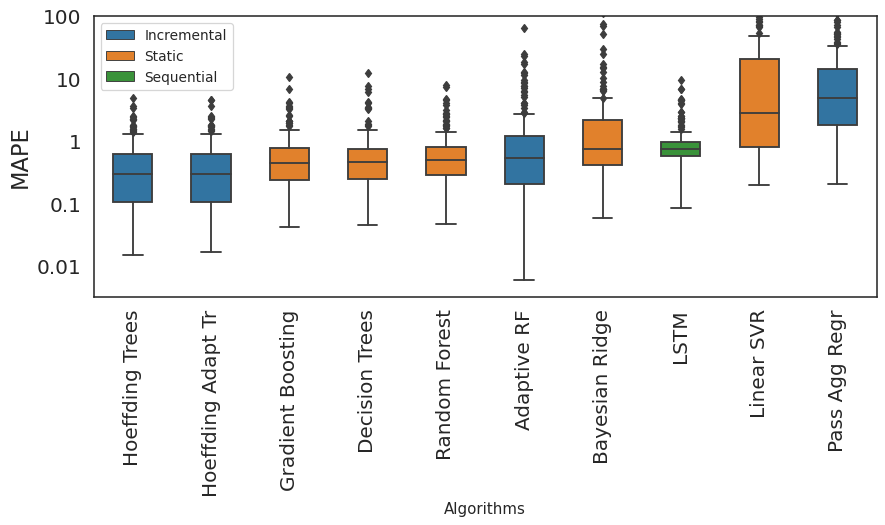

In [ ]:
save_filename = 'fig1'
read_preprocess_plot_graph(exp1_filenames, col_mapper, save_filename, metric_type)

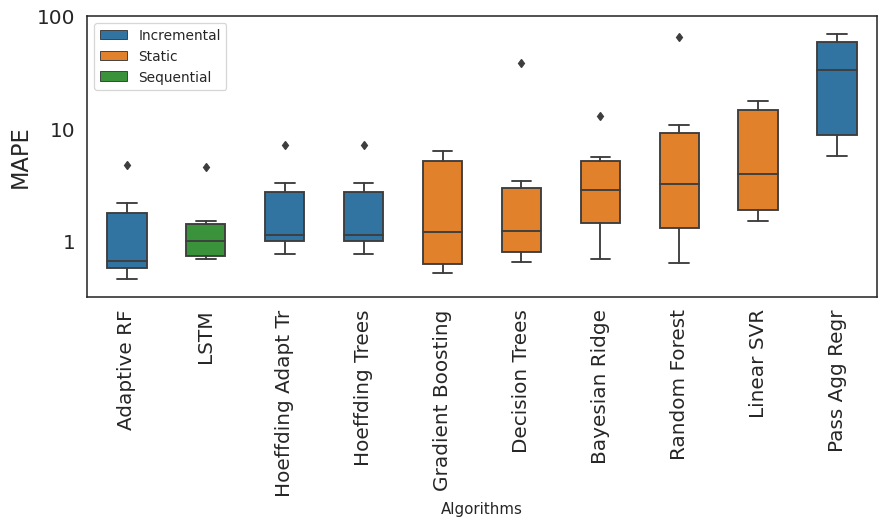

In [ ]:
save_filename = 'fig2'
read_preprocess_plot_graph(exp2_filenames, col_mapper, save_filename,  metric_type)

In [ ]:
!zip -r /content/Plots.zip /content/Plots
from google.colab import files
files.download("/content/Plots.zip")


updating: content/Plots/ (stored 0%)
updating: content/Plots/boxplots/ (stored 0%)
updating: content/Plots/boxplots/fig2.pdf (deflated 30%)
updating: content/Plots/boxplots/fig1.pdf (deflated 36%)
updating: content/Plots/barplot/ (stored 0%)
updating: content/Plots/barplot/top_selected_country_cases.pdf (deflated 32%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>